# **Economic Damage Prediction and Anomaly Detection in Global Natural Disaster Data Using Machine Learning**



---


###**Prudensy F. Opit** 🚀

31/05/2025

###Redi School Munich -- Machine Learning Course ⚡


---



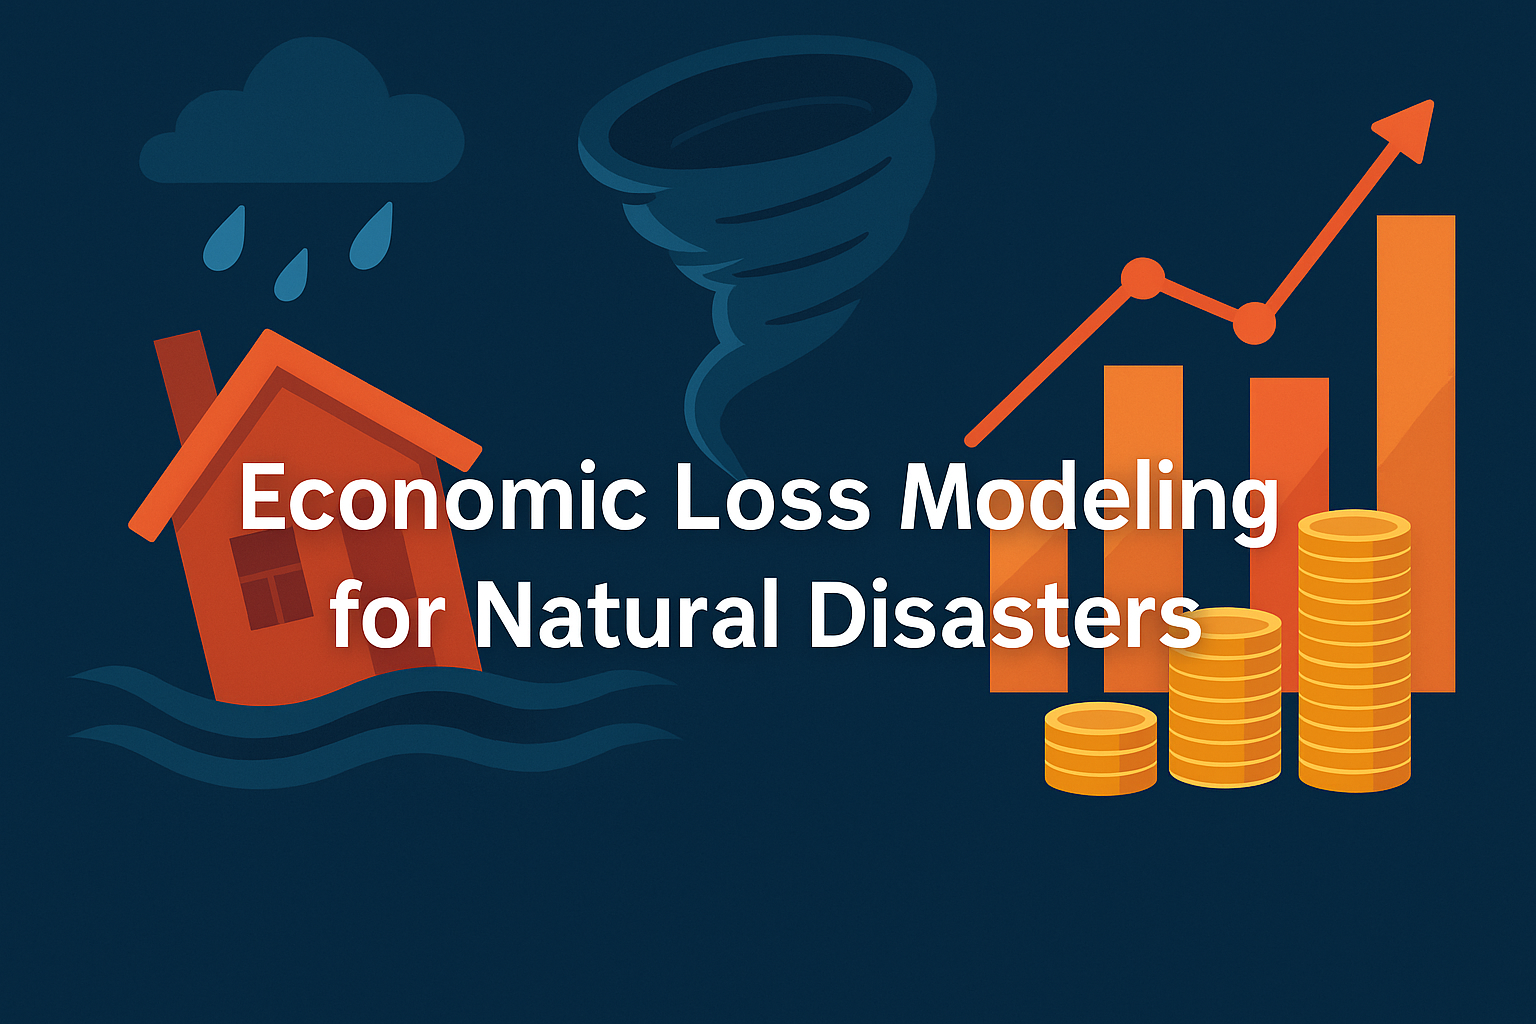

*Image generated by ChatGPT AI*


---



# **Project Workflow Overview**

### **1. Problem Statement and Dataset Selection**

* Define the main goals of the project and choose relevant datasets that best support those goals, ensuring the data is reliable, complete, and suitable for the machine learning techniques applied.

### 2. **Data Preparation (Load, clean, and merge datasets)**

* Handle missing values, fix column formats, standardize text fields, and merge relevant datasets into one unified table.

### 3. **Exploratory Data Analysis (EDA)**

* Visualize distributions, detect unusual cases, and identify features that may need transformation or exclusion.

### 4. **Feature Engineering**

* Create necessary features (encodings), examine correlations, and flag potential outliers to support modeling and clustering.

### 5. **Model Development and Evaluation**

**5.1. Regression Modeling**
* Train and evaluate multiple models — Linear Regression, Random Forest, XGBoost, CatBoost, and Neural Network.
* Assess model performance using RMSE and R² metrics.
* Visualize predicted vs. actual total damage.

**5.2. Anomaly Detection**
* Detect economic outliers using HDBSCAN clustering — identifying disasters with damage values that deviate significantly from expected patterns.
* Apply PCA for dimensionality reduction prior to clustering.

### 6. **Ethical Considerations and Limitations**

* Evaluate potential data bias due to filtering and missing values.
* Discuss risks of using model outputs in funding or insurance decisions.
* Highlight challenges in temporal generalization and interpretability of complex models.

### 7. **Conclusion and Future Work**

* Summarize key findings and model insights.
* Propose future directions, such as incorporating additional data sources or testing temporal robustness.

---


# **1. Problem Statement and Dataset Selection**

## **Problem Statement**

Natural disasters like floods, storms, and earthquakes can cause serious damage. But it's often hard to predict how much economic loss they might bring, or to spot which events were much worse (or better) than expected. Having a way to estimate this damage and find unusual cases can really help with planning, budgeting, and disaster response.

## **Objectives**

### **1. Predicting Total Damage (Regression)**

* **Goal**:
  * Estimate potential economic losses based on disaster characteristics such as type, region, population, GDP per capita, INFORM risk score, and vulnerability indicators.
  * Evaluate and compare various regression models (Linear Regression, Random Forest, XGBoost, CatBoost, Neural Network) to identify the most effective for this prediction task.
* **Usefulness**: Supports decision-making for emergency budgets, insurance modeling, and disaster preparedness.
* **Real-world Application**: Valuable to governments, NGOs, humanitarian organizations, and risk modeling firms (e.g., insurance and reinsurance companies).

### **2. Detecting Anomalies or Outliers (Clustering)**

* **Goal**:
  * Identify disasters with unusually high or low damage relative to similar events, highlighting anomalies that may indicate reporting inconsistencies or unique vulnerabilities/resilience.
  * Apply HDBSCAN, a density-based clustering method suited for discovering irregular patterns without requiring the number of clusters in advance.
* **Usefulness**: Uncovers hidden vulnerabilities, misreported events, or unusually resilient cases.
* **Real-world Application**: Informs policy revisions, disaster risk audits, and international funding prioritization.

## **Dataset Selection**

The project integrates real-world data from multiple reputable sources (EM-DAT, INFORM Risk Index, World Bank GDP & population statistics, etc.), selected for their comprehensive coverage of disaster impact, socio-economic context, and geographic diversity. Only entries with complete feature data were included to ensure model reliability.

Below are the main data sources:

**1. EM-DAT: The International Disaster Database**

      Dataset: public_emdat_2025-05-12.xlsx

      Description: Disaster occurrence, deaths, affected populations, and economic losses globally.

      Source: https://www.emdat.be

      Access: Free registration required.

**2. World Bank & Our World in Data**

      Dataset: World bank & Our world in data

      Description: Global development indicators (GDP per capita, population, population density).

      Source:
      - https://data.worldbank.org/indicator/NY.GDP.PCAP.CD
      - https://data.worldbank.org/indicator/EN.POP.DNST
      - https://ourworldindata.org
      - https://github.com/owid/owid-datasets


**3. EC-JRC: INFORM Risk Index (Mid 2024, Version 068)**

      Dataset: inform_risk_mid_2024_v068

      Description: Country-level risk data including hazard exposure, vulnerability, coping capacity.

      Source: https://drmkc.jrc.ec.europa.eu/inform-index

      Direct Link to Data: https://drmkc.jrc.ec.europa.eu/inform-index/INFORM-Risk


## **Machine Learning Technique Selection**

Regression models (e.g., XGBoost, CatBoost) are ideal for predicting continuous outcomes like total damage. Tree-based models are particularly effective with tabular, mixed-type data, while neural networks offer a performance benchmark despite data size limitations.

HDBSCAN is chosen for anomaly detection due to its ability to handle clusters of varying densities and flag outliers naturally, making it well-suited for uncovering economic outliers in disaster data.



---



---


# **2. Data Preparation (Load, clean, and merge datasets)**

In [ ]:
# Mount file in google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import library
import pandas as pd

# Load the Excel file (first sheet or specify sheet_name)
file_path = '/content/drive/MyDrive/Colab Notebooks/Redi Final Project/public_emdat_2025-05-12.xlsx'

df = pd.read_excel(file_path)

# Preview the data
display(df.head())

DisNo. Historic Classification Key Disaster Group Disaster Subgroup  \
0  1999-9388-DJI       No    nat-cli-dro-dro        Natural    Climatological   
1  1999-9388-SDN       No    nat-cli-dro-dro        Natural    Climatological   
2  1999-9388-SOM       No    nat-cli-dro-dro        Natural    Climatological   
3  2000-0001-AGO       No    tec-tra-roa-roa  Technological         Transport   
4  2000-0002-AGO       No    nat-hyd-flo-riv        Natural      Hydrological   

  Disaster Type Disaster Subtype External IDs Event Name  ISO  ...  \
0       Drought          Drought          NaN        NaN  DJI  ...   
1       Drought          Drought          NaN        NaN  SDN  ...   
2       Drought          Drought          NaN        NaN  SOM  ...   
3          Road             Road          NaN        NaN  AGO  ...   
4         Flood   Riverine flood          NaN        NaN  AGO  ...   

  Reconstruction Costs ('000 US$) Reconstruction Costs, Adjusted ('000 US$)  \
0                             NaN                                       NaN   
1                             NaN                                       NaN   
2                             NaN                                       NaN   
3                             NaN                                       NaN   
4                             NaN                                       NaN   

  Insured Damage ('000 US$) Insured Damage, Adjusted ('000 US$)  \
0                       NaN                                 NaN   
1                       NaN                                 NaN   
2                       NaN                                 NaN   
3                       NaN                                 NaN   
4                       NaN                                 NaN   

  Total Damage ('000 US$) Total Damage, Adjusted ('000 US$)        CPI  \
0                     NaN                               NaN  58.111474   
1                     NaN                               NaN  56.514291   
2                     NaN                               NaN  56.514291   
3                     NaN                               NaN  56.514291   
4                 10000.0                           17695.0  56.514291   

                                         Admin Units  Entry Date  Last Update  
0  [{"adm1_code":1093,"adm1_name":"Ali Sabieh"},{...  2006-03-01   2023-09-25  
1  [{"adm1_code":2757,"adm1_name":"Northern Darfu...  2006-03-08   2023-09-25  
2  [{"adm1_code":2691,"adm1_name":"Bay"},{"adm1_c...  2006-03-08   2023-09-25  
3                                                NaN  2004-10-27   2023-09-25  
4  [{"adm2_code":4214,"adm2_name":"Baia Farta"},{...  2005-02-03   2023-09-25  

[5 rows x 46 columns]

In [ ]:
# Dataset Overview and Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16228 entries, 0 to 16227
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     16228 non-null  object 
 1   Historic                                   16228 non-null  object 
 2   Classification Key                         16228 non-null  object 
 3   Disaster Group                             16228 non-null  object 
 4   Disaster Subgroup                          16228 non-null  object 
 5   Disaster Type                              16228 non-null  object 
 6   Disaster Subtype                           16228 non-null  object 
 7   External IDs                               2712 non-null   object 
 8   Event Name                                 5111 non-null   object 
 9   ISO                                        16228 non-null  object 
 10  Country               

In [ ]:
# Dataset Dimensions: Rows and Columns Count
df.shape

(16228, 46)

In [ ]:
# Count Missing Values per Column
df.isnull().sum()

DisNo.                                           0
Historic                                         0
Classification Key                               0
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                                 0
External IDs                                 13516
Event Name                                   11117
ISO                                              0
Country                                          0
Subregion                                        0
Region                                           0
Location                                       710
Origin                                       12150
Associated Types                             12785
OFDA/BHA Response                                0
Appeal                                           0
Declaration                                      0
AID Contribution ('000 US$)                  15739
Magnitude                                    12915
Magnitude Scale                               6080
Latitude                                     14412
Longitude                                    14412
River Basin                                  14994
Start Year                                       0
Start Month                                     69
Start Day                                     1571
End Year                                         0
End Month                                      164
End Day                                       1500
Total Deaths                                  3175
No. Injured                                  10195
No. Affected                                  8716
No. Homeless                                 14894
Total Affected                                4122
Reconstruction Costs ('000 US$)              16195
Reconstruction Costs, Adjusted ('000 US$)    16195
Insured Damage ('000 US$)                    15515
Insured Damage, Adjusted ('000 US$)          15534
Total Damage ('000 US$)                      12991
Total Damage, Adjusted ('000 US$)            13118
CPI                                            701
Admin Units                                   7812
Entry Date                                       0
Last Update                                      0
dtype: int64

In [ ]:
print(df.columns.tolist())

['DisNo.', 'Historic', 'Classification Key', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region', 'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal', 'Declaration', "AID Contribution ('000 US$)", 'Magnitude', 'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected', "Reconstruction Costs ('000 US$)", "Reconstruction Costs, Adjusted ('000 US$)", "Insured Damage ('000 US$)", "Insured Damage, Adjusted ('000 US$)", "Total Damage ('000 US$)", "Total Damage, Adjusted ('000 US$)", 'CPI', 'Admin Units', 'Entry Date', 'Last Update']


In [ ]:
# Number of Unique Countries in the Dataset
df['Country'].nunique()

222

In [ ]:
# Use only the columns that we need and filter only for Natural disasters

df1 = df[df['Disaster Group'] == 'Natural'][[
    'Start Year', 'Start Month', 'Start Day',
    'End Year', 'End Month', 'End Day', 'Disaster Group', 'Disaster Subgroup',
    'Disaster Type', 'Disaster Subtype', 'ISO', 'Country',
    'Total Deaths', 'No. Injured', 'No. Homeless', 'Total Affected',
    "Total Damage, Adjusted ('000 US$)"
]]

display(df1.head())


Start Year  Start Month  Start Day  End Year  End Month  End Day  \
0        2001          6.0        NaN      2001        NaN      NaN   
1        2000          1.0        NaN      2001        NaN      NaN   
2        2000          1.0        NaN      2001        NaN      NaN   
4        2000          1.0        8.0      2000        1.0     15.0   
5        2000          1.0        NaN      2000        1.0      NaN   

  Disaster Group Disaster Subgroup        Disaster Type Disaster Subtype  ISO  \
0        Natural    Climatological              Drought          Drought  DJI   
1        Natural    Climatological              Drought          Drought  SDN   
2        Natural    Climatological              Drought          Drought  SOM   
4        Natural      Hydrological                Flood   Riverine flood  AGO   
5        Natural    Meteorological  Extreme temperature        Cold wave  BGD   

      Country  Total Deaths  No. Injured  No. Homeless  Total Affected  \
0    Djibouti           NaN          NaN           NaN        100000.0   
1       Sudan           NaN          NaN           NaN       2000000.0   
2     Somalia          21.0          NaN           NaN       1200000.0   
4      Angola          31.0          NaN           NaN         70000.0   
5  Bangladesh          49.0          NaN           NaN             NaN   

   Total Damage, Adjusted ('000 US$)  
0                                NaN  
1                                NaN  
2                                NaN  
4                            17695.0  
5                                NaN

In [ ]:
# Filter data to include only complete records (no nulls) in relevant column (Total Damage)

df1 = df1.dropna(subset="Total Damage, Adjusted ('000 US$)").reset_index(drop=True)

display(df1.head())

df1.shape

Start Year  Start Month  Start Day  End Year  End Month  End Day  \
0        2000          1.0        8.0      2000        1.0     15.0   
1        2000          1.0       26.0      2000        3.0     27.0   
2        2000          1.0       15.0      2000        1.0     19.0   
3        2000          1.0        2.0      2000        1.0      4.0   
4        2000          1.0       14.0      2000        1.0     14.0   

  Disaster Group Disaster Subgroup Disaster Type  \
0        Natural      Hydrological         Flood   
1        Natural      Hydrological         Flood   
2        Natural    Climatological      Wildfire   
3        Natural    Meteorological         Storm   
4        Natural       Geophysical    Earthquake   

                   Disaster Subtype  ISO                   Country  \
0                    Riverine flood  AGO                    Angola   
1                    Riverine flood  MOZ                Mozambique   
2  Land fire (Brush, Bush, Pasture)  ZAF              South Africa   
3                           Tornado  USA  United States of America   
4                   Ground movement  CHN                     China   

   Total Deaths  No. Injured  No. Homeless  Total Affected  \
0          31.0          NaN           NaN         70000.0   
1         800.0          NaN           NaN       4500000.0   
2           NaN          NaN         250.0          1250.0   
3           1.0         12.0         150.0           162.0   
4           7.0       2528.0       92479.0       1855007.0   

   Total Damage, Adjusted ('000 US$)  
0                            17695.0  
1                           741759.0  
2                            17695.0  
3                           371587.0  
4                           130056.0

(3073, 17)

In [ ]:
# Combine into start date

df1['Start Date'] = pd.to_datetime(dict(
    year=df1['Start Year'],
    month=df1['Start Month'],
    day=df1['Start Day']
), errors='coerce')

# Combine into end date

df1['End Date'] = pd.to_datetime(dict(
    year=df1['End Year'],
    month=df1['End Month'],
    day=df1['End Day']
), errors='coerce')

df_disaster = (df1[['Start Date', 'End Date', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
                    'ISO', 'Country', 'Total Deaths', 'No. Injured', 'No. Homeless', 'Total Affected', "Total Damage, Adjusted ('000 US$)"]])

display(df_disaster.head())

Start Date   End Date Disaster Group Disaster Subgroup Disaster Type  \
0 2000-01-08 2000-01-15        Natural      Hydrological         Flood   
1 2000-01-26 2000-03-27        Natural      Hydrological         Flood   
2 2000-01-15 2000-01-19        Natural    Climatological      Wildfire   
3 2000-01-02 2000-01-04        Natural    Meteorological         Storm   
4 2000-01-14 2000-01-14        Natural       Geophysical    Earthquake   

                   Disaster Subtype  ISO                   Country  \
0                    Riverine flood  AGO                    Angola   
1                    Riverine flood  MOZ                Mozambique   
2  Land fire (Brush, Bush, Pasture)  ZAF              South Africa   
3                           Tornado  USA  United States of America   
4                   Ground movement  CHN                     China   

   Total Deaths  No. Injured  No. Homeless  Total Affected  \
0          31.0          NaN           NaN         70000.0   
1         800.0          NaN           NaN       4500000.0   
2           NaN          NaN         250.0          1250.0   
3           1.0         12.0         150.0           162.0   
4           7.0       2528.0       92479.0       1855007.0   

   Total Damage, Adjusted ('000 US$)  
0                            17695.0  
1                           741759.0  
2                            17695.0  
3                           371587.0  
4                           130056.0

In [ ]:
df_disaster.shape

(3073, 13)

In [ ]:
# Fetch Population Data from World Bank Dataset

import pandas as pd

file_path_pop = '/content/drive/MyDrive/Colab Notebooks/Redi Final Project/Our wold in data v7 2022.xlsx'

df_pop = pd.read_excel(file_path_pop, sheet_name='data-for-countries-etc-by-year')

# Preview the data
display(df_pop.head())

geo         name  time  Population
0  afg  Afghanistan  1800   3280000.0
1  afg  Afghanistan  1801   3280000.0
2  afg  Afghanistan  1802   3280000.0
3  afg  Afghanistan  1803   3280000.0
4  afg  Afghanistan  1804   3280000.0

In [ ]:
display(df_pop.shape)

df_pop.info()

(59297, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59297 entries, 0 to 59296
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   geo         59297 non-null  object 
 1   name        59297 non-null  object 
 2   time        59297 non-null  int64  
 3   Population  59197 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ MB


In [ ]:
# Clean the dataset: drop rows with null values

df_pop = df_pop.dropna().reset_index(drop=True)

display(df_pop.head())

df_pop.shape

geo         name  time  Population
0  afg  Afghanistan  1800   3280000.0
1  afg  Afghanistan  1801   3280000.0
2  afg  Afghanistan  1802   3280000.0
3  afg  Afghanistan  1803   3280000.0
4  afg  Afghanistan  1804   3280000.0

(59197, 4)

In [ ]:
# Unique Countries Count
df_pop['geo'].nunique()

197

In [ ]:
# Check the oldest and newest data by year (time)
print(df_pop['time'].min())
print(df_pop['time'].max())

1800
2100


In [ ]:
# Fetch other additional data (Inform risk score, vulnerability, etc) from EC-JRC datasets

file_path_inform = '/content/drive/MyDrive/Colab Notebooks/Redi Final Project/inform_risk_mid_2024_v068.xlsx'

df_inform = pd.read_excel(file_path_inform, sheet_name='INFORM Risk 2024 (a-z)', header=1)

# Preview the data
display(df_inform.head())

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Unknown extension is not supported and will be removed

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning:

Conditional Formatting extension is not supported and will be removed



COUNTRY   ISO3 INFORM RISK            RISK CLASS     Rank  \
0        (a-z)  (a-z)      (0-10)  (Very Low-Very High)  (1-191)   
1  Afghanistan    AFG         7.7             Very High        5   
2      Albania    ALB         3.2                Medium       99   
3      Algeria    DZA         3.2                Medium       99   
4       Angola    AGO         5.2                  High       33   

  Lack of Reliability (*) HAZARD & EXPOSURE Natural Earthquake River Flood  \
0                  (0-10)            (0-10)  (0-10)     (0-10)      (0-10)   
1                3.458937               8.7     5.8        8.9         7.3   
2                2.994872               3.4     5.7        8.3         4.6   
3                2.178404               2.7     3.2        7.9         3.6   
4                2.178404               4.1       3        0.1           4   

   ...     DRR Governance  Infrastructure Communication  \
0  ...  (0-10)     (0-10)          (0-10)        (0-10)   
1  ...     6.3        8.4             6.7           6.3   
2  ...       x        5.6             2.2           1.8   
3  ...     3.5        6.2             3.7           2.8   
4  ...     5.2        6.9             7.2             6   

  Physical infrastructure Access to health care Number of Missing Indicators  \
0                  (0-10)                (0-10)                       (0-50)   
1                     5.8                   8.1                            4   
2                     1.4                   3.4                            6   
3                     4.1                   4.1                            0   
4                     7.8                   7.8                            0   

  % of Missing Indicators Countries in HVC Recentness data (average years)  
0                (0-100%)         (Yes/No)                              ()  
1                0.078431              YES                        0.318841  
2                0.117647              NaN                        0.261538  
3                       0              NaN                        0.408451  
4                       0              NaN                        0.408451  

[5 rows x 42 columns]

In [ ]:
# Clean and Prepare INFORM Risk Dataset

df_inform.columns = df_inform.columns.str.strip().str.upper()

df_informx = df_inform[[
    'COUNTRY',
    'ISO3',
    'INFORM RISK',
    'RISK CLASS',
    'HAZARD & EXPOSURE',
    'VULNERABILITY',
    'LACK OF COPING CAPACITY'
]]

df_informx = df_informx.drop(index=0).reset_index(drop=True)

# convert some columns with datatype object to float
cols_to_convert = ['INFORM RISK', 'HAZARD & EXPOSURE', 'VULNERABILITY', 'LACK OF COPING CAPACITY']
df_informx[cols_to_convert] = df_informx[cols_to_convert].astype(float)

display(df_informx.head())

COUNTRY ISO3  INFORM RISK RISK CLASS  HAZARD & EXPOSURE  \
0          Afghanistan  AFG          7.7  Very High                8.7   
1              Albania  ALB          3.2     Medium                3.4   
2              Algeria  DZA          3.2     Medium                2.7   
3               Angola  AGO          5.2       High                4.1   
4  Antigua and Barbuda  ATG          2.3        Low                2.0   

   VULNERABILITY  LACK OF COPING CAPACITY  
0            7.4                      7.1  
1            2.3                      4.1  
2            2.8                      4.3  
3            5.1                      6.7  
4            1.7                      3.5

In [ ]:
print(df_informx.shape)
print(df_informx.info())

(191, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   COUNTRY                  191 non-null    object 
 1   ISO3                     191 non-null    object 
 2   INFORM RISK              191 non-null    float64
 3   RISK CLASS               191 non-null    object 
 4   HAZARD & EXPOSURE        191 non-null    float64
 5   VULNERABILITY            191 non-null    float64
 6   LACK OF COPING CAPACITY  191 non-null    float64
dtypes: float64(4), object(3)
memory usage: 10.6+ KB
None


In [ ]:
print(df_informx.isnull().sum())

COUNTRY                    0
ISO3                       0
INFORM RISK                0
RISK CLASS                 0
HAZARD & EXPOSURE          0
VULNERABILITY              0
LACK OF COPING CAPACITY    0
dtype: int64


In [ ]:
df_informx['COUNTRY'].nunique()

191

In [ ]:
# Merge df_disaster and disaster_pop datasets

df_disaster = df_disaster.copy()
df_pop = df_pop.copy()
df_informx = df_informx.copy()

# Fix just the 'Country' column — not the whole DataFrame
df_disaster['ISO'] = df_disaster['ISO'].str.lower()
df_pop['geo'] = df_pop['geo'].str.lower()
df_informx['ISO3'] = df_informx['ISO3'].str.lower()

# Extract year and month from Start Date
df_disaster['Year'] = pd.to_datetime(df_disaster['Start Date'], errors='coerce').dt.year
df_disaster['Month'] = pd.to_datetime(df_disaster['Start Date'], errors='coerce').dt.month

df_merged1 = pd.merge(df_disaster, df_pop [['geo', 'name', 'time', 'Population']], how='left', left_on=['ISO', 'Year'], right_on=['geo', 'time'])

df_merged1 = df_merged1[['Start Date', 'End Date', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'ISO', 'Country',
                         'Year', 'Month', 'Population', 'Total Deaths', 'No. Injured', 'No. Homeless', 'Total Affected', "Total Damage, Adjusted ('000 US$)"]]

df_merged1.head()

Start Date   End Date Disaster Group Disaster Subgroup Disaster Type  \
0 2000-01-08 2000-01-15        Natural      Hydrological         Flood   
1 2000-01-26 2000-03-27        Natural      Hydrological         Flood   
2 2000-01-15 2000-01-19        Natural    Climatological      Wildfire   
3 2000-01-02 2000-01-04        Natural    Meteorological         Storm   
4 2000-01-14 2000-01-14        Natural       Geophysical    Earthquake   

                   Disaster Subtype  ISO                   Country    Year  \
0                    Riverine flood  ago                    Angola  2000.0   
1                    Riverine flood  moz                Mozambique  2000.0   
2  Land fire (Brush, Bush, Pasture)  zaf              South Africa  2000.0   
3                           Tornado  usa  United States of America  2000.0   
4                   Ground movement  chn                     China  2000.0   

   Month    Population  Total Deaths  No. Injured  No. Homeless  \
0    1.0  1.639406e+07          31.0          NaN           NaN   
1    1.0  1.776850e+07         800.0          NaN           NaN   
2    1.0  4.681327e+07           NaN          NaN         250.0   
3    1.0  2.823986e+08           1.0         12.0         150.0   
4    1.0  1.264099e+09           7.0       2528.0       92479.0   

   Total Affected  Total Damage, Adjusted ('000 US$)  
0         70000.0                            17695.0  
1       4500000.0                           741759.0  
2          1250.0                            17695.0  
3           162.0                           371587.0  
4       1855007.0                           130056.0

In [ ]:
df_merged1.shape

(3073, 16)

In [ ]:
# Merge df_merged1 and df_informx

df_merged2 = pd.merge(df_merged1, df_informx, how='left', left_on=['ISO'], right_on=['ISO3'])

df_merged2 = df_merged2[['Start Date', 'End Date', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'ISO', 'Country',
                         'Year', 'Month', 'Population', 'Total Deaths', 'No. Injured', 'No. Homeless', 'Total Affected', "Total Damage, Adjusted ('000 US$)",
                         'INFORM RISK', 'RISK CLASS', 'HAZARD & EXPOSURE', 'VULNERABILITY', 'LACK OF COPING CAPACITY']]

# Rename each feature
df_final = df_merged2.rename(columns={
    'Start Date': 'start_date',
    'End Date': 'end_date',
    'Disaster Group': 'disaster_group',
    'Disaster Subgroup': 'disaster_subgroup',
    'Disaster Type': 'disaster_type',
    'Disaster Subtype': 'disaster_subtype',
    'ISO': 'iso',
    'Country': 'country',
    'Year': 'year',
    'Month': 'month',
    'Population': 'population',
    'Total Deaths': 'total_deaths',
    'No. Injured': 'no_injured',
    'No. Homeless': 'no_homeless',
    'Total Affected': 'total_affected',
    'INFORM RISK': 'inform_risk',
    'RISK CLASS': 'risk_class',
    'HAZARD & EXPOSURE': 'hazard_exposure',
    'VULNERABILITY': 'vulnerability',
    'LACK OF COPING CAPACITY': 'lack_coping_capacity',
    "Total Damage, Adjusted ('000 US$)": 'total_damage'
})

# Preview the result
df_final.head()

start_date   end_date disaster_group disaster_subgroup disaster_type  \
0 2000-01-08 2000-01-15        Natural      Hydrological         Flood   
1 2000-01-26 2000-03-27        Natural      Hydrological         Flood   
2 2000-01-15 2000-01-19        Natural    Climatological      Wildfire   
3 2000-01-02 2000-01-04        Natural    Meteorological         Storm   
4 2000-01-14 2000-01-14        Natural       Geophysical    Earthquake   

                   disaster_subtype  iso                   country    year  \
0                    Riverine flood  ago                    Angola  2000.0   
1                    Riverine flood  moz                Mozambique  2000.0   
2  Land fire (Brush, Bush, Pasture)  zaf              South Africa  2000.0   
3                           Tornado  usa  United States of America  2000.0   
4                   Ground movement  chn                     China  2000.0   

   month  ...  total_deaths  no_injured  no_homeless  total_affected  \
0    1.0  ...          31.0         NaN          NaN         70000.0   
1    1.0  ...         800.0         NaN          NaN       4500000.0   
2    1.0  ...           NaN         NaN        250.0          1250.0   
3    1.0  ...           1.0        12.0        150.0           162.0   
4    1.0  ...           7.0      2528.0      92479.0       1855007.0   

   total_damage  inform_risk  risk_class hazard_exposure  vulnerability  \
0       17695.0          5.2        High             4.1            5.1   
1      741759.0          6.6        High             6.1            7.7   
2       17695.0          4.1      Medium             3.8            4.5   
3      371587.0          3.2      Medium             5.0            3.2   
4      130056.0          3.0         Low             5.5            1.6   

   lack_coping_capacity  
0                   6.7  
1                   6.2  
2                   4.1  
3                   2.0  
4                   3.2  

[5 rows x 21 columns]

In [ ]:
# Fetch population density & GDP per capita datasets (World Bank)
file_path_density = '/content/drive/MyDrive/Colab Notebooks/Redi Final Project/Population_Density__Long_Format_WB.csv'
file_path_gdp = '/content/drive/MyDrive/Colab Notebooks/Redi Final Project/GDP_per_Capita__Long_Format_.csv'

df_density = pd.read_csv(file_path_density, header=0)
df_gdp = pd.read_csv(file_path_gdp, header=0)

# Preview the datasets
display(df_density.head())
display(df_gdp.head())


Unnamed: 0                 Country Name Country Code  Year  \
0         798                        Aruba          ABW  1961   
1         799  Africa Eastern and Southern          AFE  1961   
2         800                  Afghanistan          AFG  1961   
3         801   Africa Western and Central          AFW  1961   
4         802                       Angola          AGO  1961   

   Population Density  
0          308.766667  
1           12.036017  
2           14.127046  
3           11.021477  
4            4.252493

Unnamed: 0                 Country Name Country Code  Year  GDP per capita
0         533  Africa Eastern and Southern          AFE  1960      186.132432
1         535   Africa Western and Central          AFW  1960      121.938353
2         545                    Australia          AUS  1960     1810.706430
3         546                      Austria          AUT  1960      939.914815
4         548                      Burundi          BDI  1960       70.905100

In [ ]:
# Merge Datasets to Create Final Analytical Dataset
df_final = df_final.copy()

df_density['Country Code'] = df_density['Country Code'].str.lower()
df_gdp['Country Code'] = df_gdp['Country Code'].str.lower()

df_density['Year'] = df_density['Year'].astype(int)
df_gdp['Year'] = df_gdp['Year'].astype(int)

# Merge df_density and df_gdp
df_densdgp = df_density.merge(df_gdp[['Country Code', 'Year', 'GDP per capita']], on=['Country Code', 'Year'], how='outer')

# Merge df_densgdp and df_final
df_final = df_final.merge(df_densdgp[['Country Code', 'Year', 'Population Density', 'GDP per capita']], how='left', left_on=['iso', 'year'], right_on=['Country Code', 'Year'])

df_final = df_final.drop(columns=['Country Code', 'Year'])

df_final = df_final.rename(columns={'Population Density': 'population_density', 'GDP per capita': 'gdp_per_capita'})

df_final.head()

start_date   end_date disaster_group disaster_subgroup disaster_type  \
0 2000-01-08 2000-01-15        Natural      Hydrological         Flood   
1 2000-01-26 2000-03-27        Natural      Hydrological         Flood   
2 2000-01-15 2000-01-19        Natural    Climatological      Wildfire   
3 2000-01-02 2000-01-04        Natural    Meteorological         Storm   
4 2000-01-14 2000-01-14        Natural       Geophysical    Earthquake   

                   disaster_subtype  iso                   country    year  \
0                    Riverine flood  ago                    Angola  2000.0   
1                    Riverine flood  moz                Mozambique  2000.0   
2  Land fire (Brush, Bush, Pasture)  zaf              South Africa  2000.0   
3                           Tornado  usa  United States of America  2000.0   
4                   Ground movement  chn                     China  2000.0   

   month  ...  no_homeless  total_affected  total_damage  inform_risk  \
0    1.0  ...          NaN         70000.0       17695.0          5.2   
1    1.0  ...          NaN       4500000.0      741759.0          6.6   
2    1.0  ...        250.0          1250.0       17695.0          4.1   
3    1.0  ...        150.0           162.0      371587.0          3.2   
4    1.0  ...      92479.0       1855007.0      130056.0          3.0   

   risk_class  hazard_exposure  vulnerability lack_coping_capacity  \
0        High              4.1            5.1                  6.7   
1        High              6.1            7.7                  6.2   
2      Medium              3.8            4.5                  4.1   
3      Medium              5.0            3.2                  2.0   
4         Low              5.5            1.6                  3.2   

   population_density  gdp_per_capita  
0           12.990189      563.733796  
1           23.054570      327.126240  
2           38.875697     3217.846934  
3           30.797301    36329.970260  
4          134.492481      959.360431  

[5 rows x 23 columns]

In [ ]:
# Check column names
df_final.columns.tolist()

['start_date',
 'end_date',
 'disaster_group',
 'disaster_subgroup',
 'disaster_type',
 'disaster_subtype',
 'iso',
 'country',
 'year',
 'month',
 'population',
 'total_deaths',
 'no_injured',
 'no_homeless',
 'total_affected',
 'total_damage',
 'inform_risk',
 'risk_class',
 'hazard_exposure',
 'vulnerability',
 'lack_coping_capacity',
 'population_density',
 'gdp_per_capita']

**Column Descriptions:**

- **start_date:** The date when the disaster began. Extracted from EM-DAT's start year/month/day columns.

- **end_date:** The date when the disaster ended. Can be used to calculate disaster duration.

- **disaster group:** The disaster group, i.e., 'Natural' or 'Technological'

- **disaster_type:** The general category of the disaster (e.g., Flood, Earthquake, Epidemic).

- **disaster_subtype:** A more specific classification of the disaster (e.g., Flash Flood, River Flood, Drought). Adds granularity.

- **iso:** The 3-letter ISO country code (e.g., DEU for Germany, NGA for Nigeria). Useful for merging/joining.

- **country:** The name of the country where the disaster occurred. Used as a key for joining with population and INFORM data.

- **year & month:** The year & month extracted from start_date. Used for time-based analysis and to merge with year-based datasets like population.

- **population:** The population of the country in the corresponding year. Pulled from World Bank or OWID dataset.

- **total_deaths:** The number of people who died as a result of the disaster. Provided by EM-DAT. Used for classification or severity scoring.

- **no_injured:** Number of people with physical injuries, trauma or illness requiring immediate medical assistance due to the disaster.

- **no_homeless:** Number of people requiring shelter due to their house being destroyed or heavily damaged during the disaster.

- **total_affected:** Total number of affected people (No. Injured No. Affected and No. Homeless combined). Also from EM-DAT.

- **total_damage ('000 USD)**: Value of all economic losses directly or indirectly due to the disaster in thousands of US dollars, adjusted for inflation using the Consumer Price Index (CPI).

- **inform_risk:** A composite score (0-10) summarizing the overall disaster risk in a country, combining hazard, vulnerability, and capacity. Pre-calculated and published by the INFORM initiative (by the EU & UN), meant to reflect a country's overall crisis and disaster risk

- **risk_class:** A qualitative label assigned to each country based on its INFORM Risk Score (0-10). It summarizes a country's overall crisis and disaster risk level.

- **hazard_exposure:** Score (0-10) reflecting how likely a country is to experience hazards like floods, earthquakes, or conflict.

- **vulnerability:** Score (0-10) indicating how fragile the country is socioeconomically (e.g., poverty, inequality, poor infrastructure).

- **lack_coping_capacity:** Score (0-10) indicating how unprepared the country is to respond to a disaster (e.g., limited governance, healthcare, logistics). Higher score = worse capacity.

In [ ]:
df_final.shape

(3073, 23)

In [ ]:
# Display Earliest and Latest Disaster Start Dates
print(df_final['start_date'].max())
print(df_final['start_date'].min())

2023-12-19 00:00:00
2000-01-02 00:00:00


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   start_date            2879 non-null   datetime64[ns]
 1   end_date              2881 non-null   datetime64[ns]
 2   disaster_group        3073 non-null   object        
 3   disaster_subgroup     3073 non-null   object        
 4   disaster_type         3073 non-null   object        
 5   disaster_subtype      3073 non-null   object        
 6   iso                   3073 non-null   object        
 7   country               3073 non-null   object        
 8   year                  2879 non-null   float64       
 9   month                 2879 non-null   float64       
 10  population            2839 non-null   float64       
 11  total_deaths          2457 non-null   float64       
 12  no_injured            1139 non-null   float64       
 13  no_homeless       

In [ ]:
df_final.isnull().sum()

start_date               194
end_date                 192
disaster_group             0
disaster_subgroup          0
disaster_type              0
disaster_subtype           0
iso                        0
country                    0
year                     194
month                    194
population               234
total_deaths             616
no_injured              1934
no_homeless             2610
total_affected           509
total_damage               0
inform_risk               91
risk_class                91
hazard_exposure           91
vulnerability             91
lack_coping_capacity      91
population_density       345
gdp_per_capita           275
dtype: int64

In [ ]:
# Preview rows with null values

df_final[df_final.isnull().any(axis=1)].head()

start_date   end_date disaster_group disaster_subgroup disaster_type  \
0 2000-01-08 2000-01-15        Natural      Hydrological         Flood   
1 2000-01-26 2000-03-27        Natural      Hydrological         Flood   
2 2000-01-15 2000-01-19        Natural    Climatological      Wildfire   
5 2000-01-26 2000-01-26        Natural       Geophysical    Earthquake   
6 2000-01-28 2000-02-01        Natural      Hydrological         Flood   

                   disaster_subtype  iso       country    year  month  ...  \
0                    Riverine flood  ago        Angola  2000.0    1.0  ...   
1                    Riverine flood  moz    Mozambique  2000.0    1.0  ...   
2  Land fire (Brush, Bush, Pasture)  zaf  South Africa  2000.0    1.0  ...   
5                   Ground movement  chn         China  2000.0    1.0  ...   
6                       Flash flood  phl   Philippines  2000.0    1.0  ...   

   no_homeless  total_affected  total_damage  inform_risk  risk_class  \
0          NaN         70000.0       17695.0          5.2        High   
1          NaN       4500000.0      741759.0          6.6        High   
2        250.0          1250.0       17695.0          4.1      Medium   
5          NaN         10302.0         855.0          3.0         Low   
6          NaN        153885.0        7219.0          5.4        High   

   hazard_exposure  vulnerability lack_coping_capacity  population_density  \
0              4.1            5.1                  6.7           12.990189   
1              6.1            7.7                  6.2           23.054570   
2              3.8            4.5                  4.1           38.875697   
5              5.5            1.6                  3.2          134.492481   
6              7.7            4.9                  4.2          267.046977   

   gdp_per_capita  
0      563.733796  
1      327.126240  
2     3217.846934  
5      959.360431  
6     1050.792730  

[5 rows x 23 columns]

In [ ]:
# Drop column no_homeless & no_injured with significant number of null values, and keep total_affected

df_final = df_final.drop(columns=['no_homeless', 'no_injured'])

df_final.head()

start_date   end_date disaster_group disaster_subgroup disaster_type  \
0 2000-01-08 2000-01-15        Natural      Hydrological         Flood   
1 2000-01-26 2000-03-27        Natural      Hydrological         Flood   
2 2000-01-15 2000-01-19        Natural    Climatological      Wildfire   
3 2000-01-02 2000-01-04        Natural    Meteorological         Storm   
4 2000-01-14 2000-01-14        Natural       Geophysical    Earthquake   

                   disaster_subtype  iso                   country    year  \
0                    Riverine flood  ago                    Angola  2000.0   
1                    Riverine flood  moz                Mozambique  2000.0   
2  Land fire (Brush, Bush, Pasture)  zaf              South Africa  2000.0   
3                           Tornado  usa  United States of America  2000.0   
4                   Ground movement  chn                     China  2000.0   

   month  ...  total_deaths  total_affected  total_damage  inform_risk  \
0    1.0  ...          31.0         70000.0       17695.0          5.2   
1    1.0  ...         800.0       4500000.0      741759.0          6.6   
2    1.0  ...           NaN          1250.0       17695.0          4.1   
3    1.0  ...           1.0           162.0      371587.0          3.2   
4    1.0  ...           7.0       1855007.0      130056.0          3.0   

   risk_class hazard_exposure  vulnerability  lack_coping_capacity  \
0        High             4.1            5.1                   6.7   
1        High             6.1            7.7                   6.2   
2      Medium             3.8            4.5                   4.1   
3      Medium             5.0            3.2                   2.0   
4         Low             5.5            1.6                   3.2   

   population_density  gdp_per_capita  
0           12.990189      563.733796  
1           23.054570      327.126240  
2           38.875697     3217.846934  
3           30.797301    36329.970260  
4          134.492481      959.360431  

[5 rows x 21 columns]

In [ ]:
df_final.isnull().sum()

start_date              194
end_date                192
disaster_group            0
disaster_subgroup         0
disaster_type             0
disaster_subtype          0
iso                       0
country                   0
year                    194
month                   194
population              234
total_deaths            616
total_affected          509
total_damage              0
inform_risk              91
risk_class               91
hazard_exposure          91
vulnerability            91
lack_coping_capacity     91
population_density      345
gdp_per_capita          275
dtype: int64

In [ ]:
# Keep only rows without null values

df_final.dropna(inplace=True)

df_final = df_final.reset_index(drop=True)
#df_final = df_final.sort_values(by='start_date')

df_final.head()

start_date   end_date disaster_group disaster_subgroup disaster_type  \
0 2000-01-08 2000-01-15        Natural      Hydrological         Flood   
1 2000-01-26 2000-03-27        Natural      Hydrological         Flood   
2 2000-01-02 2000-01-04        Natural    Meteorological         Storm   
3 2000-01-14 2000-01-14        Natural       Geophysical    Earthquake   
4 2000-01-26 2000-01-26        Natural       Geophysical    Earthquake   

  disaster_subtype  iso                   country    year  month  ...  \
0   Riverine flood  ago                    Angola  2000.0    1.0  ...   
1   Riverine flood  moz                Mozambique  2000.0    1.0  ...   
2          Tornado  usa  United States of America  2000.0    1.0  ...   
3  Ground movement  chn                     China  2000.0    1.0  ...   
4  Ground movement  chn                     China  2000.0    1.0  ...   

   total_deaths  total_affected  total_damage  inform_risk  risk_class  \
0          31.0         70000.0       17695.0          5.2        High   
1         800.0       4500000.0      741759.0          6.6        High   
2           1.0           162.0      371587.0          3.2      Medium   
3           7.0       1855007.0      130056.0          3.0         Low   
4           1.0         10302.0         855.0          3.0         Low   

  hazard_exposure  vulnerability  lack_coping_capacity  population_density  \
0             4.1            5.1                   6.7           12.990189   
1             6.1            7.7                   6.2           23.054570   
2             5.0            3.2                   2.0           30.797301   
3             5.5            1.6                   3.2          134.492481   
4             5.5            1.6                   3.2          134.492481   

   gdp_per_capita  
0      563.733796  
1      327.126240  
2    36329.970260  
3      959.360431  
4      959.360431  

[5 rows x 21 columns]

Since there are records with small total damage values (e.g., $3000), which could result from reporting errors or missing estimates we apply a filter to remove such entries to improve data quality and model reliability.

In [ ]:
# Investigate minimum total_damage
print(df_final['total_damage'].min())

# Filter for Significant Economic Damage (≥ 10,000 USD) and Reset Index for cleaner DataFrame structure
df_final = df_final[df_final['total_damage'] >= 10] # Total Damage adjusted ('000 US$)
df_final = df_final.reset_index(drop=True)
df_final.head()

3.0


start_date   end_date disaster_group disaster_subgroup disaster_type  \
0 2000-01-08 2000-01-15        Natural      Hydrological         Flood   
1 2000-01-26 2000-03-27        Natural      Hydrological         Flood   
2 2000-01-02 2000-01-04        Natural    Meteorological         Storm   
3 2000-01-14 2000-01-14        Natural       Geophysical    Earthquake   
4 2000-01-26 2000-01-26        Natural       Geophysical    Earthquake   

  disaster_subtype  iso                   country    year  month  ...  \
0   Riverine flood  ago                    Angola  2000.0    1.0  ...   
1   Riverine flood  moz                Mozambique  2000.0    1.0  ...   
2          Tornado  usa  United States of America  2000.0    1.0  ...   
3  Ground movement  chn                     China  2000.0    1.0  ...   
4  Ground movement  chn                     China  2000.0    1.0  ...   

   total_deaths  total_affected  total_damage  inform_risk  risk_class  \
0          31.0         70000.0       17695.0          5.2        High   
1         800.0       4500000.0      741759.0          6.6        High   
2           1.0           162.0      371587.0          3.2      Medium   
3           7.0       1855007.0      130056.0          3.0         Low   
4           1.0         10302.0         855.0          3.0         Low   

  hazard_exposure  vulnerability  lack_coping_capacity  population_density  \
0             4.1            5.1                   6.7           12.990189   
1             6.1            7.7                   6.2           23.054570   
2             5.0            3.2                   2.0           30.797301   
3             5.5            1.6                   3.2          134.492481   
4             5.5            1.6                   3.2          134.492481   

   gdp_per_capita  
0      563.733796  
1      327.126240  
2    36329.970260  
3      959.360431  
4      959.360431  

[5 rows x 21 columns]

In [ ]:
# Check for duplicates

df_final.duplicated().sum()

np.int64(0)

In [ ]:
# Check the final dataset's shape

df_final.shape

(1913, 21)

In [ ]:
df_final['year'].max()

2022.0

In [ ]:
df_final['year'].min()

2000.0

In [ ]:
print(df_final['country'].unique().tolist())
print(f"Number of country: {df_final['country'].nunique()}")

['Angola', 'Mozambique', 'United States of America', 'China', 'Philippines', 'South Africa', 'Zimbabwe', 'Israel', 'Australia', 'Madagascar', 'Romania', 'Hungary', 'Indonesia', 'Türkiye', 'Chile', 'Bulgaria', 'Canada', 'Cambodia', 'Republic of Korea', 'India', 'Japan', 'Brazil', 'Russian Federation', 'Iran (Islamic Republic of)', 'Viet Nam', 'Belize', 'Mexico', 'Nicaragua', 'Italy', 'Switzerland', 'Spain', 'United Kingdom of Great Britain and Northern Ireland', 'Sri Lanka', 'Thailand', 'Azerbaijan', 'Malaysia', 'Ukraine', 'El Salvador', 'Guatemala', 'Afghanistan', 'Bolivia (Plurinational State of)', 'Pakistan', 'Argentina', 'France', 'Peru', 'Poland', 'Nigeria', 'Chad', 'Dominican Republic', 'Honduras', 'Cuba', 'Jamaica', 'Algeria', 'Morocco', 'Tajikistan', 'Senegal', 'Democratic Republic of the Congo', 'Mauritius', 'Germany', 'Ecuador', 'Uruguay', 'Georgia', 'Panama', 'Haiti', 'Micronesia (Federated States of)', 'Venezuela (Bolivarian Republic of)', 'Czechia', 'Austria', 'Albania', 'F

ISO country codes (the data used in this project) include up to 249 entities, including territories and regions.

As of May 2025, the most widely accepted number of countries is:
- 195 countries in the world (193 are member states of the United Nations (UN))
- 2 are observer states: Vatican City & Palestine

So, we're covering approximately 62% (122 out of 195) of all countries in the world.

In [ ]:
print(df_final['disaster_group'].nunique())
print(df_final['disaster_group'].unique().tolist())

1
['Natural']


In [ ]:
print(df_final['disaster_subgroup'].nunique())
print(df_final['disaster_subgroup'].unique().tolist())

4
['Hydrological', 'Meteorological', 'Geophysical', 'Climatological']


In [ ]:
print(df_final['disaster_type'].nunique())
print(df_final['disaster_type'].unique().tolist())

9
['Flood', 'Storm', 'Earthquake', 'Wildfire', 'Mass movement (wet)', 'Extreme temperature', 'Volcanic activity', 'Drought', 'Mass movement (dry)']


In [ ]:
df_final['disaster_subtype'].nunique()

30

# **3. Exploratory Data Analysis (EDA)**

In [ ]:
# Import libraries

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Generate a statistical summary of the numeric columns

display(df_final.describe())

start_date                       end_date  \
count                           1913                           1913   
mean   2011-07-25 10:27:47.328802816  2011-08-03 02:35:49.085206272   
min              2000-01-02 00:00:00            2000-01-04 00:00:00   
25%              2005-10-24 00:00:00            2005-10-28 00:00:00   
50%              2012-03-15 00:00:00            2012-03-20 00:00:00   
75%              2016-11-14 00:00:00            2016-11-14 00:00:00   
max              2022-12-26 00:00:00            2023-03-26 00:00:00   
std                              NaN                            NaN   

              year        month    population   total_deaths  total_affected  \
count  1913.000000  1913.000000  1.913000e+03    1913.000000    1.913000e+03   
mean   2011.051751     6.676947  3.595241e+08     513.857815    1.122179e+06   
min    2000.000000     1.000000  6.877500e+04       1.000000    1.000000e+00   
25%    2005.000000     4.000000  3.853281e+07       4.000000    2.500000e+03   
50%    2012.000000     7.000000  1.024293e+08      14.000000    2.500000e+04   
75%    2016.000000     9.000000  3.220340e+08      46.000000    2.354180e+05   
max    2022.000000    12.000000  1.425893e+09  222570.000000    1.501460e+08   
std       6.475165     3.171225  5.031178e+08    7657.301644    6.729117e+06   

       total_damage  inform_risk  hazard_exposure  vulnerability  \
count  1.913000e+03  1913.000000      1913.000000    1913.000000   
mean   1.678891e+06     3.894041         5.179718       3.523419   
min    1.300000e+01     1.500000         0.900000       0.900000   
25%    2.264400e+04     3.000000         3.600000       2.300000   
50%    1.435910e+05     3.200000         5.500000       3.200000   
75%    7.347790e+05     5.000000         6.800000       4.700000   
max    2.844652e+08     8.600000         9.000000       8.400000   
std    9.825761e+06     1.307072         1.830171       1.518497   

       lack_coping_capacity  population_density  gdp_per_capita  
count           1913.000000         1913.000000     1913.000000  
mean               3.575013          167.782571    14513.279188  
min                0.900000            1.595418      138.706822  
25%                2.400000           40.796670     1881.022666  
50%                3.600000          137.235919     4703.007218  
75%                4.300000          272.308077    17886.733165  
max                8.600000         1301.259100    78035.175360  
std                1.346362          164.881432    19298.227260

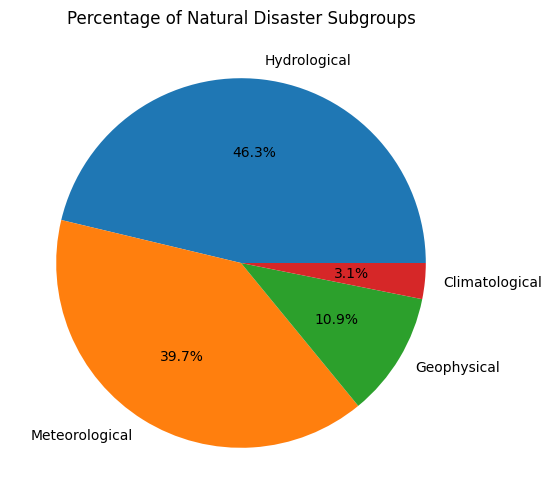

In [ ]:
# Percentage of Natural Disaster Subgroup

plt.figure(figsize=(8, 6))
df_final['disaster_subgroup'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentage of Natural Disaster Subgroups')
plt.ylabel('')
plt.show()

**Explanation:**
1. **Meteorological:** Disasters caused by short-term weather patterns (Storms, tropical cyclones, hurricanes, typhoons, tornados, blizzards)
2. **Hydrological:** Disasters involving the movement or distribution of water (Floods, flash floods, landslides (if rain-induced), avalanches)
3. **Geophysical:** Disasters caused by Earth’s internal processes (Earthquakes, tsunamis, volcanic eruptions, landslides (sometimes))
4. **Climatological:** Disasters caused by long-term weather patterns or anomalies (Droughts, extreme heat waves, wildfires, glacial lake outbursts).

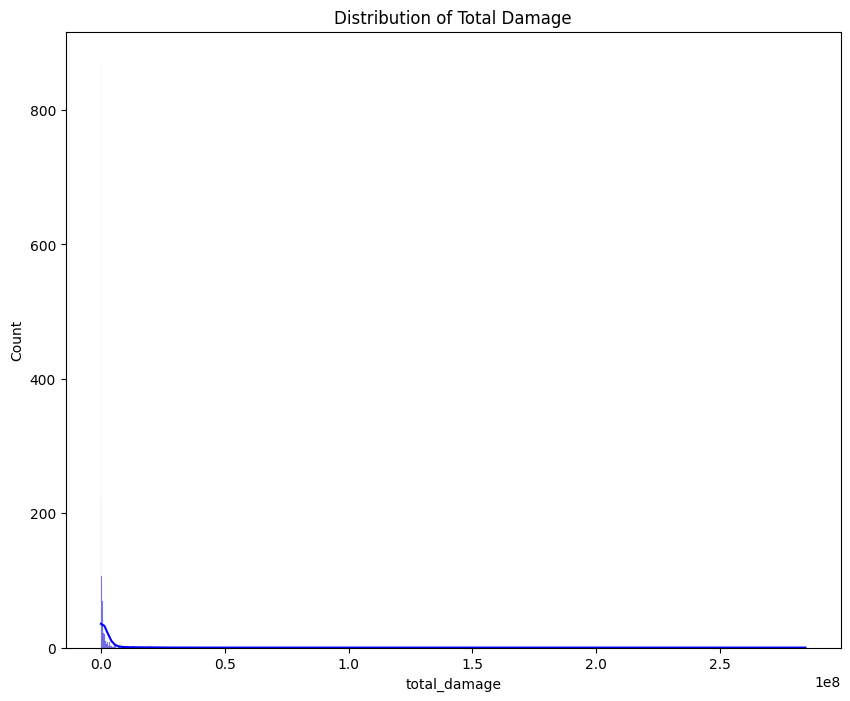

In [ ]:
# Distribution of Target (total_damage)

plt.figure(figsize=(10, 8))
sns.histplot(data=df_final, x='total_damage', kde=True, color='blue')
plt.title('Distribution of Total Damage')
plt.show()

The distribution looks extremely right-skewed (heavy tail to the right), and that's expected for economic damage data.

Most disasters cause small to moderate damage. The majority of events result in relatively low economic losses.

A few outliers (like tsunamis, earthquakes in dense cities) cause massive damage. This creates a long tail to the right.

The y-axis is compressed because of extreme outliers. A few huge events such as Japan 2011 tsunami, stretch the scale of the x-axis.

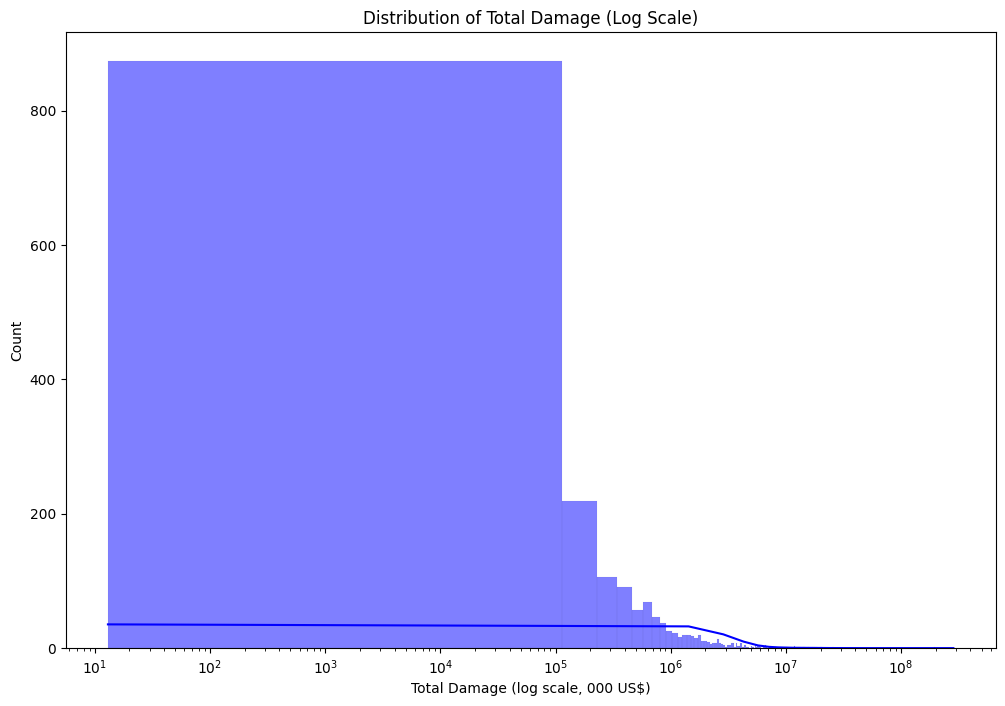

In [ ]:
# Use a log scale on the x-axis to keep the outliers but makes the rest visible.

plt.figure(figsize=(12, 8))
sns.histplot(data=df_final, x='total_damage', kde=True, color='blue')
plt.xscale('log')
plt.title('Distribution of Total Damage (Log Scale)')
plt.xlabel('Total Damage (log scale, 000 US$)')
plt.show()

This is the true shape of the distribution after applying a logarithmic x-axis.

Most of disasters have relatively low economic damage, but there's a long tail of rare, high-damage events.

The kde line now gives a meaningful estimate of density, something that was squished before.

More specific:

- Most disasters caused relatively small financial damage (under 1M USD)

- There are some big spikes early on (left side), meaning many disasters caused ~10k-100k USD damage

- The tail stretches far right: a few disasters caused very large damage (hundreds of millions or billions)

- Right-skewed distribution: is this classic for natural disaster cost data?

**The outliers (large damages) are not errors but are critical and rare events.**

**Removing them would bias our model and ignore the very events we likely care most about** (for example in disaster preparedness or policy planning).

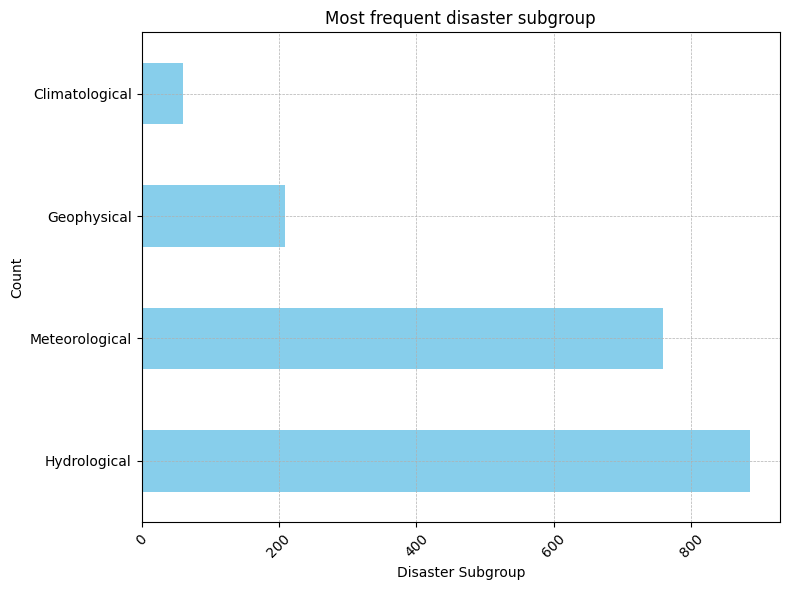

In [ ]:
# Most frequent disaster subgroup

plt.figure(figsize=(8, 6))
df_final['disaster_subgroup'].value_counts().plot(kind='barh', color='skyblue')
plt.title('Most frequent disaster subgroup')
plt.xlabel('Disaster Subgroup')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

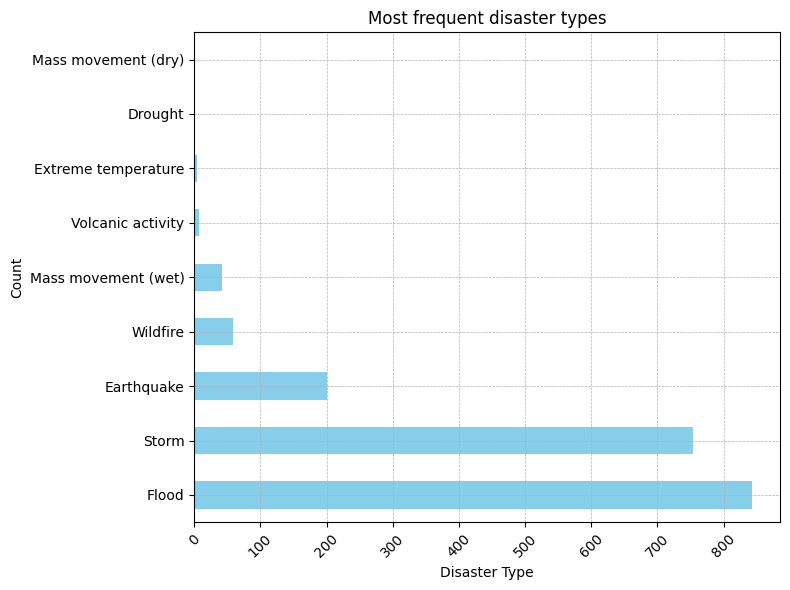

In [ ]:
# Most frequent disaster types

plt.figure(figsize=(8, 6))
df_final['disaster_type'].value_counts().plot(kind='barh', color='skyblue')
plt.title('Most frequent disaster types')
plt.xlabel('Disaster Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

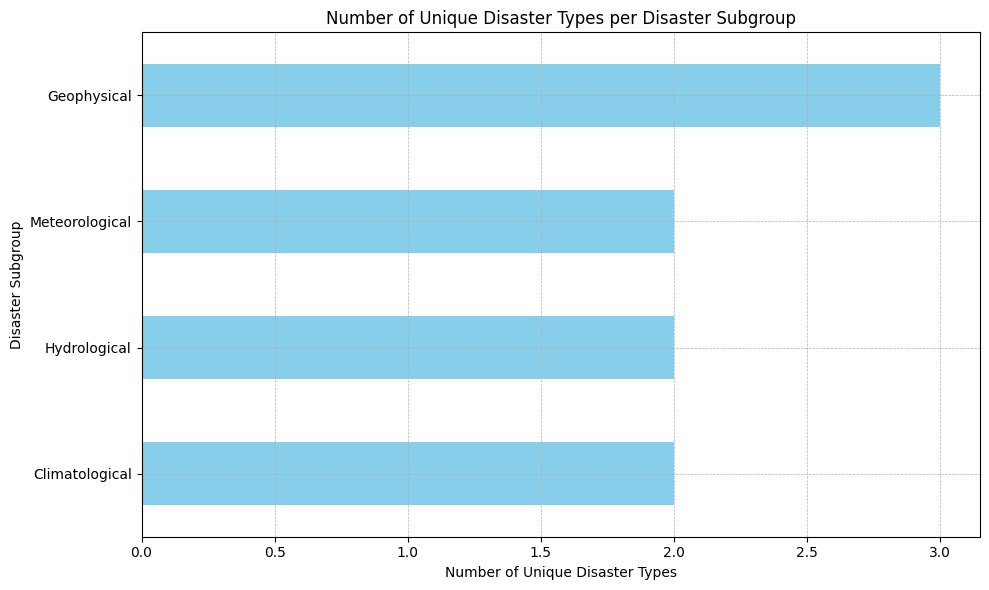

In [ ]:
# Check the number of disaster type for each disaster subgroup

plt.figure(figsize=(10, 6))

type_counts = df_final.groupby('disaster_subgroup')['disaster_type'].nunique().sort_values()

type_counts.plot(kind='barh', color='skyblue')
plt.title('Number of Unique Disaster Types per Disaster Subgroup')
plt.xlabel('Number of Unique Disaster Types')
plt.ylabel('Disaster Subgroup')
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

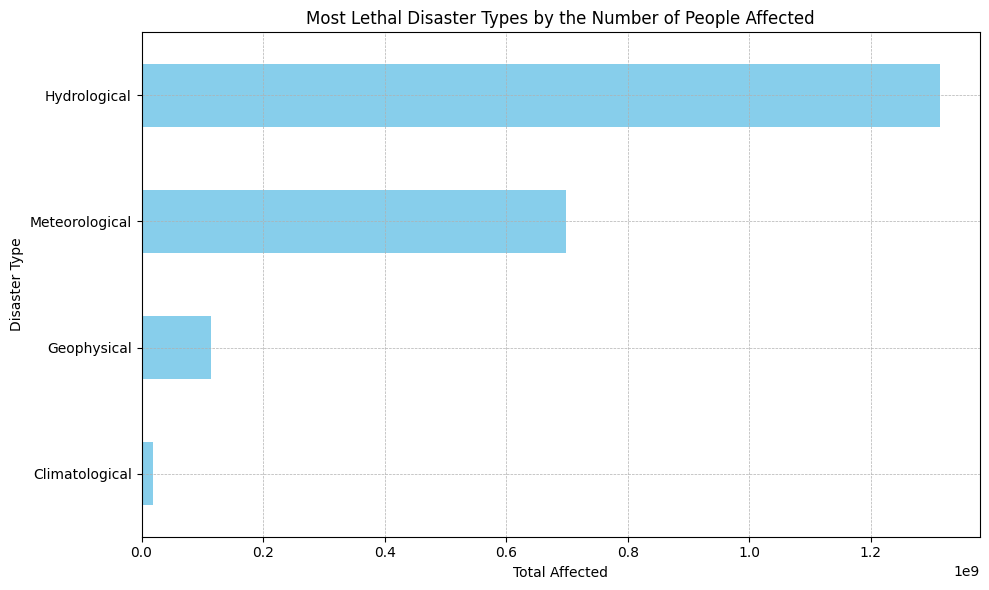

In [ ]:
# Plot most lethal disaster types by the number of people affected

lethal_disaster = df_final.groupby('disaster_subgroup')['total_affected'].sum().sort_values().tail(5)

plt.figure(figsize=(10, 6))
lethal_disaster.plot(kind='barh', color='skyblue')
#sns.barplot(x=lethal_disaster.values, y=lethal_disaster.index, color='skyblue')
plt.title('Most Lethal Disaster Types by the Number of People Affected')
plt.xlabel('Total Affected')
plt.ylabel('Disaster Type')
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Top 10 Countries with the Highest Population Affected by Disasters

df_top10 = df_final.groupby('country')['total_affected'].sum().reset_index()
df_top10 = df_top10.sort_values(by='total_affected', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='total_affected', y='country', data=df_top10, color='lightgreen')
plt.title('Top 10 Countries with the Most Affected Population')
plt.xlabel('Total Affected')
plt.ylabel('Country')
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Top 10 Countries with the Lowest Population Affected by Disasters

df_low10 = df_final.groupby('country')['total_affected'].sum().reset_index()
df_low10 = df_low10.sort_values(by='total_affected', ascending=False).tail(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='total_affected', y='country', data=df_low10, color='lightgreen')
plt.title('Top 10 Countries with the Least Affected Population')
plt.xlabel('Total Affected')
plt.ylabel('Country')
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

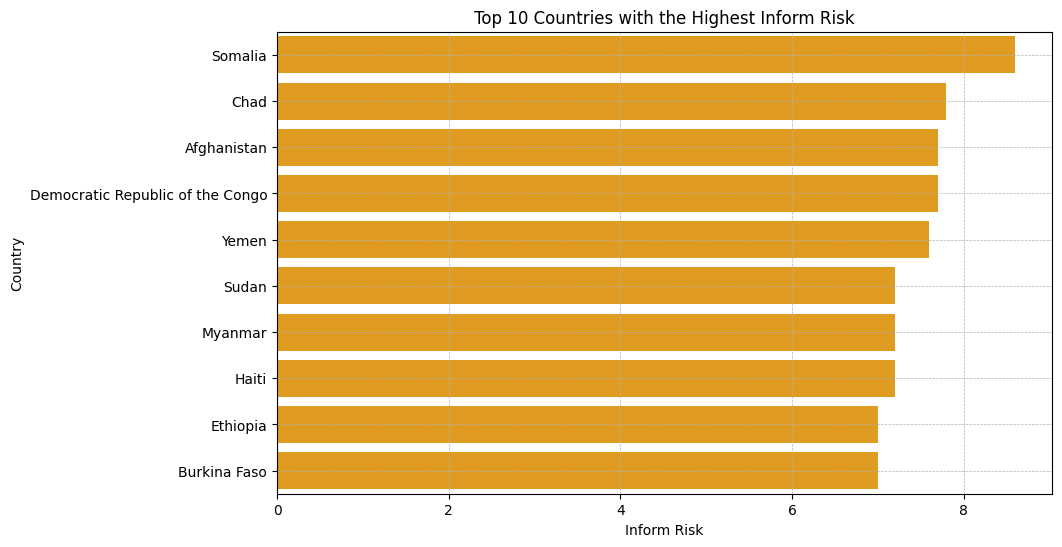

In [ ]:
# Plot top 10 countries with the highest inform risk

df_topinform= df_final.groupby('country')['inform_risk'].mean().reset_index()
df_topinform = df_topinform.sort_values(by='inform_risk', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='inform_risk', y='country', data=df_topinform, color='orange')
plt.title('Top 10 Countries with the Highest Inform Risk')
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.xlabel('Inform Risk')
plt.ylabel('Country')
plt.show()

In [ ]:
# Plot top 10 countries with the lowest inform risk

df_lowinform= df_final.groupby('country')['inform_risk'].mean().reset_index()
df_lowinform = df_lowinform.sort_values(by='inform_risk').head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='inform_risk', y='country', data=df_lowinform, color='orange')
plt.title('Top 10 Countries with the Lowest Inform Risk')
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.xlabel('Inform Risk')
plt.ylabel('Country')
plt.show()

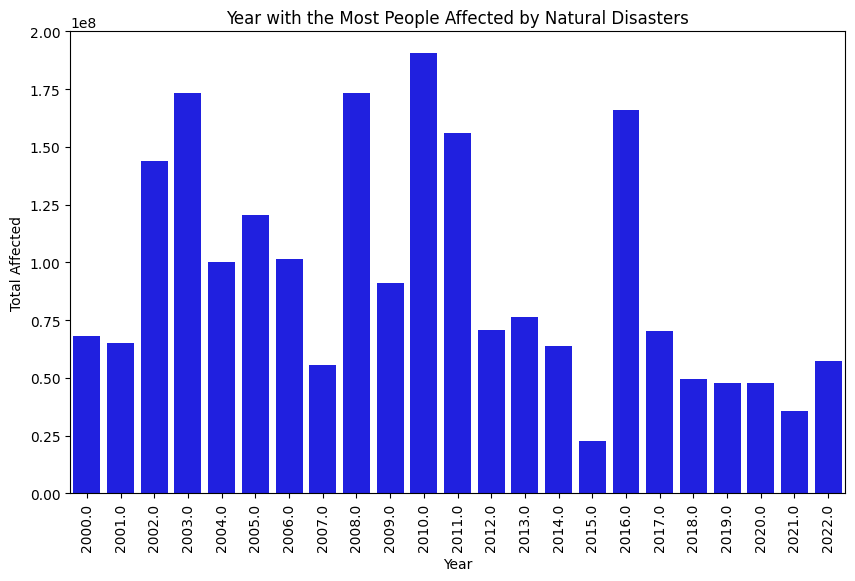

In [ ]:
# Plot year with the most people affected by disasters

df_year = df_final.groupby('year')['total_affected'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='total_affected', data=df_year, color='blue')
plt.title('Year with the Most People Affected by Natural Disasters')
plt.xlabel('Year')
plt.ylabel('Total Affected')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Plot year with the most disasters

df_year_disaster = df_final.groupby('year')['disaster_type'].count().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='disaster_type', data=df_year_disaster, color='blue')
#sns.barplot(x=df_year_disaster.index, y=df_year_disaster.values, color='lightgreen')
plt.title('Year with the Highest Number of Natural Disasters')
plt.xlabel('Year')
plt.ylabel('Number of Disasters')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Get the most frequent disaster subgroup per country
top_subgroup = df_final.groupby('country')['disaster_subgroup'].agg(lambda x: x.value_counts().idxmax()).reset_index()
top_subgroup.columns = ['country', 'top_subgroup']
# ISO
top_subgroup = top_subgroup.merge(df_final[['country', 'iso']].drop_duplicates(), on='country', how='left')


In [ ]:
# Visualize the most frequent disaster subgroup per country

import plotly.express as px

# Make sure ISO codes are upper-case 3-letter
top_subgroup['iso'] = top_subgroup['iso'].str.upper()

fig = px.choropleth(
    top_subgroup,
    locations='iso',
    color='top_subgroup',
    hover_name='country',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='Most Frequent Disaster Subgroup by Country')

fig.update_geos(showcoastlines=True, showframe=False)
fig.show()

In [ ]:
# Calculate total damage for each country
top_damage = df_final.groupby('country')['total_damage'].sum().reset_index()
# ISO
top_damage = top_damage.merge(df_final[['country', 'iso']].drop_duplicates(), on='country', how='left')


In [ ]:
# Visualize Total Disaster Damage by Country

# Make sure ISO codes are upper-case 3-letter
top_damage['iso'] = top_damage['iso'].str.upper()

fig = px.choropleth(
    top_damage,
    locations='iso',
    color='total_damage',
    hover_name='country',
    color_continuous_scale='YlOrRd',
    title='Total Disaster Damage by Country (in Thousands USD)')

fig.update_geos(showframe=False, showcoastlines=True)
fig.update_layout(coloraxis_colorbar=dict(title="Total Damage"))
fig.show()

In [ ]:
# Plot top countries with the most total damage

df_damage = df_final.groupby('country')['total_damage'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    y='country',
    x='total_damage',
    data=df_damage.sort_values(by='total_damage', ascending=False).head(15),
    color='red',
)
plt.title('Top 15 Countries with the Most Total Damage')
plt.xlabel('Total Damage (000 US$)')
plt.ylabel('Country')
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

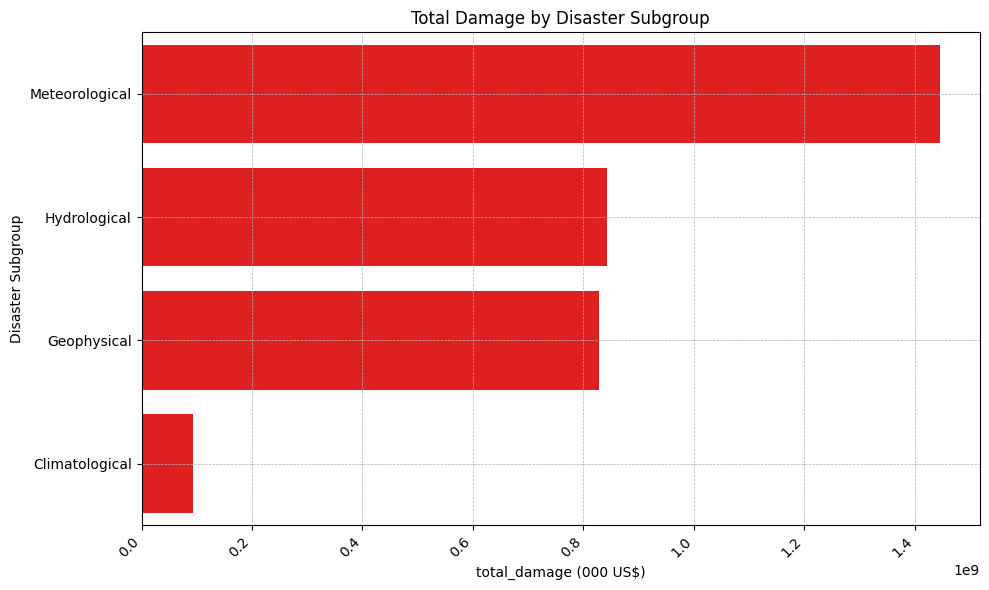

In [ ]:
# Plot disaster subgroup with the most total damage in USD

df_damage = df_final.groupby('disaster_subgroup')['total_damage'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='total_damage', y='disaster_subgroup',
            data=df_damage.sort_values(by='total_damage', ascending=False), color='red')
plt.title('Total Damage by Disaster Subgroup')
plt.xlabel('total_damage (000 US$)')
plt.ylabel('Disaster Subgroup')
plt.xticks(rotation=45, ha='right')
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Explanation:**
1. **Meteorological:** Disasters caused by short-term weather patterns (Storms, tropical cyclones, hurricanes, typhoons, tornados, blizzards)
2. **Hydrological:** Disasters involving the movement or distribution of water (Floods, flash floods, landslides (if rain-induced), avalanches)
3. **Geophysical:** Disasters caused by Earth’s internal processes (Earthquakes, tsunamis, volcanic eruptions, landslides (sometimes))
4. **Climatological:** Disasters caused by long-term weather patterns or anomalies (Droughts, extreme heat waves, wildfires, glacial lake outbursts).



---



# **4. Feature Engineering**

## **1. Duration (how long the disaster lasted)**

---> Long-lasting events may have greater impact

In [ ]:
df_feature = df_final.copy()

df_feature['disaster_duration'] = (df_feature['end_date'] - df_feature['start_date']).dt.days

#df_feature = df_feature.sort_values(by='disaster_duration', ascending=False)

# Replace all disaster_duration = 0 to 1
df_feature ['disaster_duration'] = df_feature['disaster_duration'].replace(0, 1)

display(df_feature.sort_values(by='disaster_duration').head())

start_date   end_date disaster_group disaster_subgroup disaster_type  \
35 2000-07-25 2000-07-25        Natural    Meteorological         Storm   
34 2000-07-08 2000-07-09        Natural    Meteorological         Storm   
32 2000-07-22 2000-07-22        Natural      Hydrological         Flood   
30 2000-07-13 2000-07-13        Natural    Meteorological         Storm   
29 2000-07-14 2000-07-14        Natural    Meteorological         Storm   

    disaster_subtype  iso                   country    year  month  ...  \
35           Tornado  usa  United States of America  2000.0    7.0  ...   
34  Tropical cyclone  jpn                     Japan  2000.0    7.0  ...   
32   Flood (General)  kor         Republic of Korea  2000.0    7.0  ...   
30           Tornado  chn                     China  2000.0    7.0  ...   
29           Tornado  can                    Canada  2000.0    7.0  ...   

    total_affected  total_damage  inform_risk  risk_class  hazard_exposure  \
35          1035.0       14333.0          3.2      Medium              5.0   
34           900.0      530839.0          2.2         Low              5.5   
32          2589.0       40698.0          1.9    Very Low              3.6   
30         20500.0         849.0          3.0         Low              5.5   
29           840.0       23003.0          2.5         Low              2.5   

   vulnerability  lack_coping_capacity  population_density  gdp_per_capita  \
35           3.2                   2.0           30.797301    36329.970260   
34           1.4                   1.4          347.991770    39169.359570   
32           1.3                   1.5          487.332687    12257.020662   
30           1.6                   3.2          134.492481      959.360431   
29           2.5                   2.4            3.422611    24271.002056   

    disaster_duration  
35                  1  
34                  1  
32                  1  
30                  1  
29                  1  

[5 rows x 22 columns]

## **2. Get Region or Continent & Income Group Data**

In [ ]:
# Add a column for region and income group (based on World Bank's Data)

# Merge df_feature with region (World Bank data)
file_path_region = '/content/drive/MyDrive/Colab Notebooks/Redi Final Project/inform_risk_mid_2024_v068.xlsx'

df_region = pd.read_excel(file_path_inform, sheet_name='Regions', header=1)
df_region['ISO3'] = df_region['ISO3'].str.lower()

df_feature = df_feature.copy()
df_feature = df_feature.merge(df_region[['ISO3', 'WB Region']], left_on='iso', right_on='ISO3', how='left')

# Drop the ISO3 column from view
df_feature = df_feature.drop(columns=['ISO3'])

# Rename the new additional columns
df_feature = df_feature.rename(columns={'WB Region': 'region'})

display(df_feature.head())
display(df_feature.shape)

start_date   end_date disaster_group disaster_subgroup disaster_type  \
0 2000-01-08 2000-01-15        Natural      Hydrological         Flood   
1 2000-01-26 2000-03-27        Natural      Hydrological         Flood   
2 2000-01-02 2000-01-04        Natural    Meteorological         Storm   
3 2000-01-14 2000-01-14        Natural       Geophysical    Earthquake   
4 2000-01-26 2000-01-26        Natural       Geophysical    Earthquake   

  disaster_subtype  iso                   country    year  month  ...  \
0   Riverine flood  ago                    Angola  2000.0    1.0  ...   
1   Riverine flood  moz                Mozambique  2000.0    1.0  ...   
2          Tornado  usa  United States of America  2000.0    1.0  ...   
3  Ground movement  chn                     China  2000.0    1.0  ...   
4  Ground movement  chn                     China  2000.0    1.0  ...   

   total_damage  inform_risk  risk_class  hazard_exposure  vulnerability  \
0       17695.0          5.2        High              4.1            5.1   
1      741759.0          6.6        High              6.1            7.7   
2      371587.0          3.2      Medium              5.0            3.2   
3      130056.0          3.0         Low              5.5            1.6   
4         855.0          3.0         Low              5.5            1.6   

  lack_coping_capacity  population_density  gdp_per_capita  disaster_duration  \
0                  6.7           12.990189      563.733796                  7   
1                  6.2           23.054570      327.126240                 61   
2                  2.0           30.797301    36329.970260                  2   
3                  3.2          134.492481      959.360431                  1   
4                  3.2          134.492481      959.360431                  1   

                region  
0   Sub-Saharan Africa  
1   Sub-Saharan Africa  
2        North America  
3  East Asia & Pacific  
4  East Asia & Pacific  

[5 rows x 23 columns]

(1913, 23)

In [ ]:
print(df_feature['region'].unique().tolist())

['Sub-Saharan Africa', 'North America', 'East Asia & Pacific', 'Middle East & North Africa', 'Europe & Central Asia', 'Latin America & Caribbean', 'South Asia']


In [ ]:
# Identify rows with missing values
df_feature[df_feature.isnull().any(axis=1)].head()

Empty DataFrame
Columns: [start_date, end_date, disaster_group, disaster_subgroup, disaster_type, disaster_subtype, iso, country, year, month, population, total_deaths, total_affected, total_damage, inform_risk, risk_class, hazard_exposure, vulnerability, lack_coping_capacity, population_density, gdp_per_capita, disaster_duration, region]
Index: []

[0 rows x 23 columns]

## **3. Disaster Subgroup & Region Encoding (One-hot encoding)**

In [ ]:
# One-hot encoding for disaster_subgroup and region
encoded_features1 = pd.get_dummies(df_feature[['disaster_subgroup', 'region']],drop_first=False, dtype=int)
encoded_features2 = pd.get_dummies(df_feature[['disaster_subgroup', 'region']],drop_first=True, dtype=int)

# Concatenate encoded features with the original DataFrame
df_reg1 = pd.concat([df_feature, encoded_features1], axis=1) # for based-tree regression models
df_reg2 = pd.concat([df_feature, encoded_features2], axis=1) # for linear regression

# Display the updated DataFrame
display(df_reg1.head())
print(df_reg1.shape)
display(df_reg2.head())
print(df_reg2.shape)

start_date   end_date disaster_group disaster_subgroup disaster_type  \
0 2000-01-08 2000-01-15        Natural      Hydrological         Flood   
1 2000-01-26 2000-03-27        Natural      Hydrological         Flood   
2 2000-01-02 2000-01-04        Natural    Meteorological         Storm   
3 2000-01-14 2000-01-14        Natural       Geophysical    Earthquake   
4 2000-01-26 2000-01-26        Natural       Geophysical    Earthquake   

  disaster_subtype  iso                   country    year  month  ...  \
0   Riverine flood  ago                    Angola  2000.0    1.0  ...   
1   Riverine flood  moz                Mozambique  2000.0    1.0  ...   
2          Tornado  usa  United States of America  2000.0    1.0  ...   
3  Ground movement  chn                     China  2000.0    1.0  ...   
4  Ground movement  chn                     China  2000.0    1.0  ...   

   disaster_subgroup_Geophysical  disaster_subgroup_Hydrological  \
0                              0                               1   
1                              0                               1   
2                              0                               0   
3                              1                               0   
4                              1                               0   

   disaster_subgroup_Meteorological  region_East Asia & Pacific  \
0                                 0                           0   
1                                 0                           0   
2                                 1                           0   
3                                 0                           1   
4                                 0                           1   

   region_Europe & Central Asia region_Latin America & Caribbean  \
0                             0                                0   
1                             0                                0   
2                             0                                0   
3                             0                                0   
4                             0                                0   

   region_Middle East & North Africa  region_North America  region_South Asia  \
0                                  0                     0                  0   
1                                  0                     0                  0   
2                                  0                     1                  0   
3                                  0                     0                  0   
4                                  0                     0                  0   

   region_Sub-Saharan Africa  
0                          1  
1                          1  
2                          0  
3                          0  
4                          0  

[5 rows x 34 columns]

(1913, 34)


start_date   end_date disaster_group disaster_subgroup disaster_type  \
0 2000-01-08 2000-01-15        Natural      Hydrological         Flood   
1 2000-01-26 2000-03-27        Natural      Hydrological         Flood   
2 2000-01-02 2000-01-04        Natural    Meteorological         Storm   
3 2000-01-14 2000-01-14        Natural       Geophysical    Earthquake   
4 2000-01-26 2000-01-26        Natural       Geophysical    Earthquake   

  disaster_subtype  iso                   country    year  month  ...  \
0   Riverine flood  ago                    Angola  2000.0    1.0  ...   
1   Riverine flood  moz                Mozambique  2000.0    1.0  ...   
2          Tornado  usa  United States of America  2000.0    1.0  ...   
3  Ground movement  chn                     China  2000.0    1.0  ...   
4  Ground movement  chn                     China  2000.0    1.0  ...   

                region  disaster_subgroup_Geophysical  \
0   Sub-Saharan Africa                              0   
1   Sub-Saharan Africa                              0   
2        North America                              0   
3  East Asia & Pacific                              1   
4  East Asia & Pacific                              1   

   disaster_subgroup_Hydrological  disaster_subgroup_Meteorological  \
0                               1                                 0   
1                               1                                 0   
2                               0                                 1   
3                               0                                 0   
4                               0                                 0   

   region_Europe & Central Asia region_Latin America & Caribbean  \
0                             0                                0   
1                             0                                0   
2                             0                                0   
3                             0                                0   
4                             0                                0   

   region_Middle East & North Africa  region_North America  region_South Asia  \
0                                  0                     0                  0   
1                                  0                     0                  0   
2                                  0                     1                  0   
3                                  0                     0                  0   
4                                  0                     0                  0   

   region_Sub-Saharan Africa  
0                          1  
1                          1  
2                          0  
3                          0  
4                          0  

[5 rows x 32 columns]

(1913, 32)


In [ ]:
df_reg1.columns

Index(['start_date', 'end_date', 'disaster_group', 'disaster_subgroup',
       'disaster_type', 'disaster_subtype', 'iso', 'country', 'year', 'month',
       'population', 'total_deaths', 'total_affected', 'total_damage',
       'inform_risk', 'risk_class', 'hazard_exposure', 'vulnerability',
       'lack_coping_capacity', 'population_density', 'gdp_per_capita',
       'disaster_duration', 'region', 'disaster_subgroup_Climatological',
       'disaster_subgroup_Geophysical', 'disaster_subgroup_Hydrological',
       'disaster_subgroup_Meteorological', 'region_East Asia & Pacific',
       'region_Europe & Central Asia', 'region_Latin America & Caribbean',
       'region_Middle East & North Africa', 'region_North America',
       'region_South Asia', 'region_Sub-Saharan Africa'],
      dtype='object')

In [ ]:
# Rename region features for better readability and consistency
df_reg1 = df_reg1.rename(columns={'region_East Asia & Pacific': 'region_eastasia_pacific', 'region_Europe & Central Asia': 'region_europe_centralasia',
                                  'region_Latin America & Caribbean': 'region_latinamerica_caribbean', 'region_Middle East & North Africa': 'region_middleeast_north_africa',
                                  'region_North America': 'region_north_america', 'region_South Asia': 'region_south_asia', 'region_Sub-Saharan Africa': 'region_subsaharan_africa'})
df_reg2 = df_reg2.rename(columns={'region_East Asia & Pacific': 'region_eastasia_pacific', 'region_Europe & Central Asia': 'region_europe_centralasia',
                                  'region_Latin America & Caribbean': 'region_latinamerica_caribbean', 'region_Middle East & North Africa': 'region_middleeast_north_africa',
                                  'region_North America': 'region_north_america', 'region_South Asia': 'region_south_asia', 'region_Sub-Saharan Africa': 'region_subsaharan_africa'})

## Detecting outliers

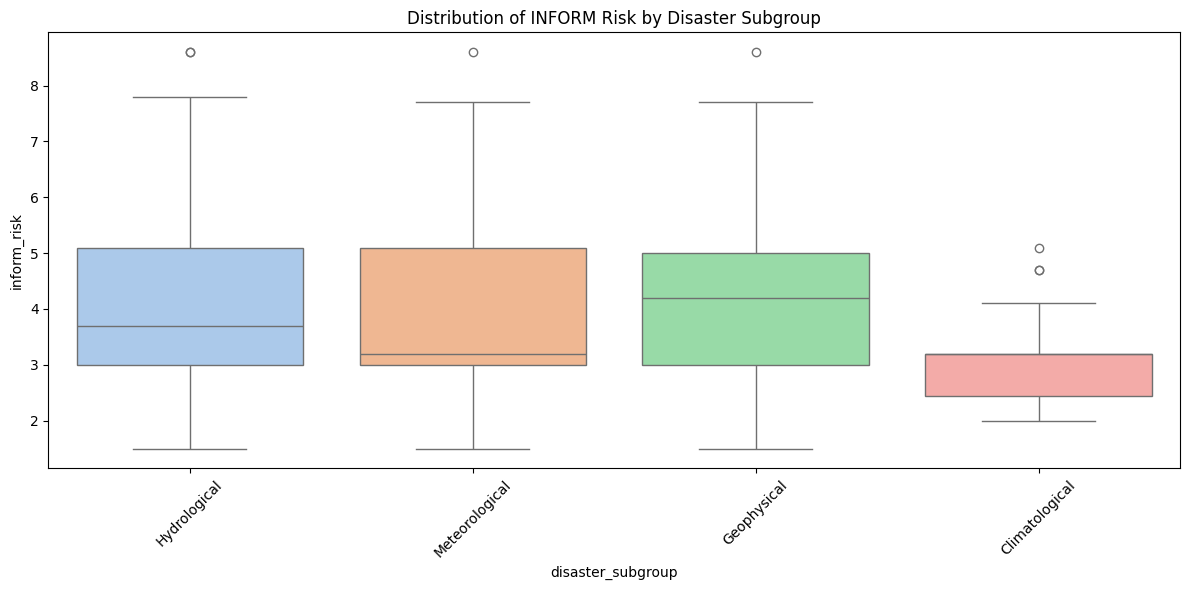

In [ ]:
# Boxplot Visualization: INFORM Risk

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_feature, x='disaster_subgroup', y='inform_risk', hue='disaster_subgroup', palette='pastel', legend=False)
plt.xticks(rotation=45)
plt.title('Distribution of INFORM Risk by Disaster Subgroup')
plt.tight_layout()
plt.show()

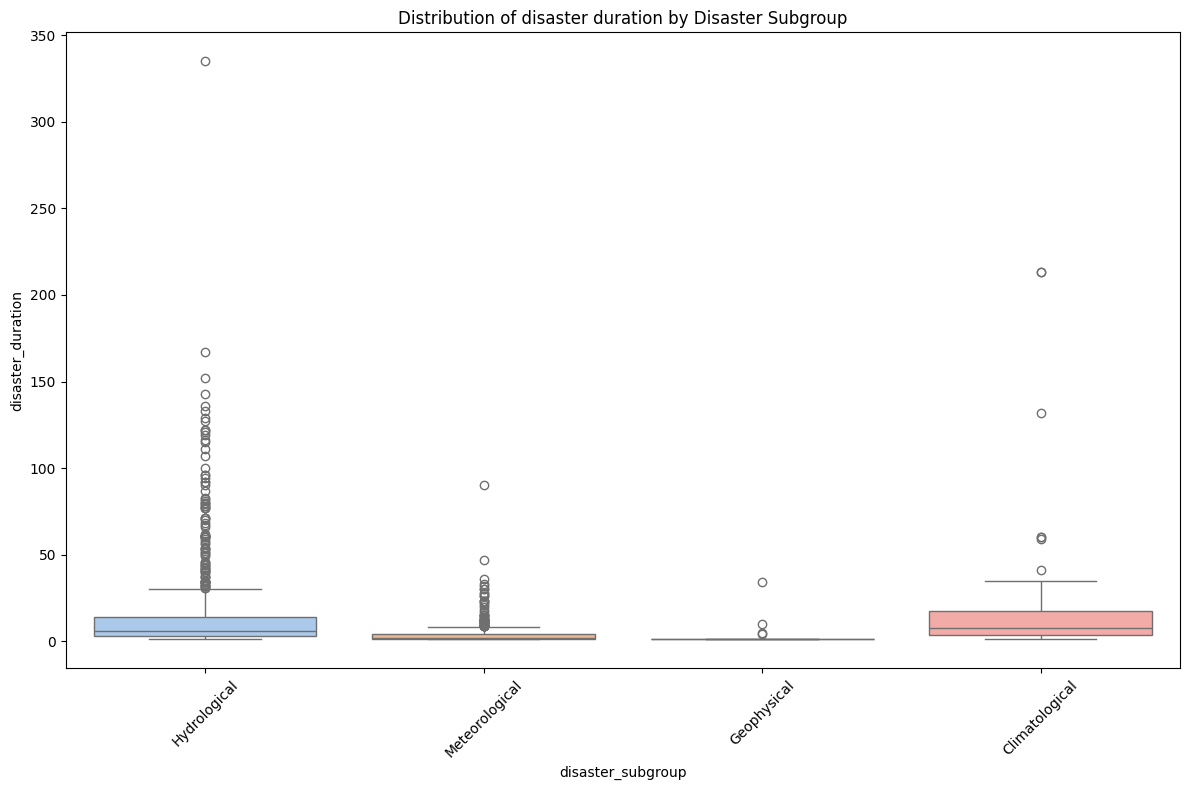

In [ ]:
# Boxplot Visualization: Disaster Duration

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_feature, x='disaster_subgroup', y='disaster_duration', hue='disaster_subgroup', palette='pastel', legend=False)
plt.xticks(rotation=45)
plt.title('Distribution of disaster duration by Disaster Subgroup')
plt.tight_layout()
plt.show()

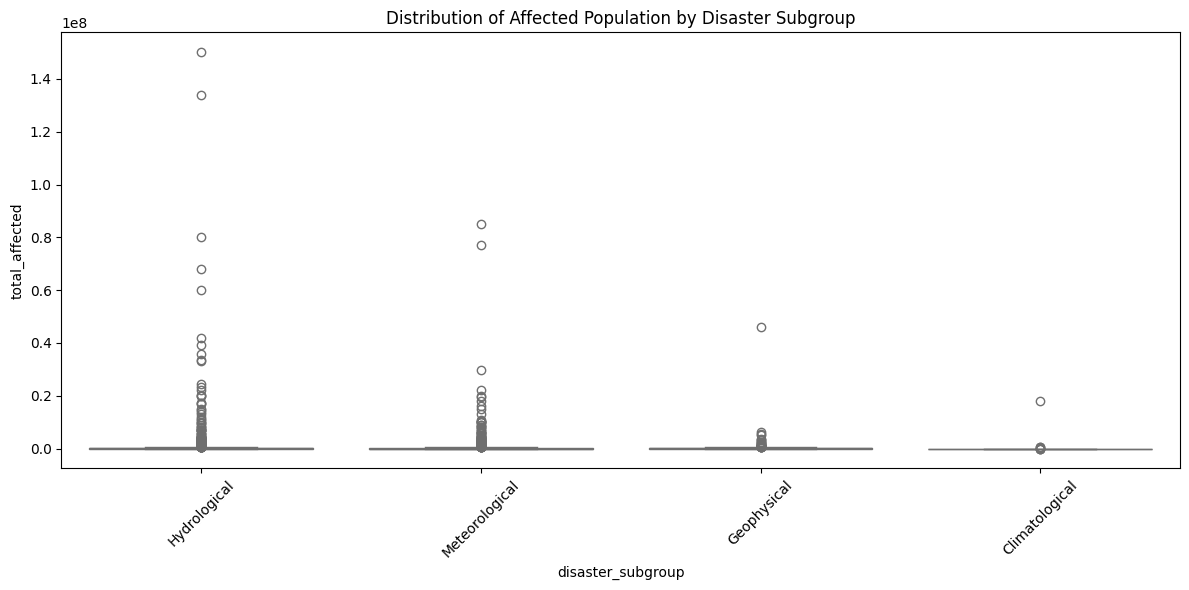

In [ ]:
# Boxplot Visualization: Total Affected Population

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_feature, x='disaster_subgroup', y='total_affected', hue='disaster_subgroup', palette='pastel', legend=False)
plt.xticks(rotation=45)
plt.title('Distribution of Affected Population by Disaster Subgroup')
plt.tight_layout()
plt.show()

In [ ]:
# Option 1: Flag the outliers using the 99th percentile (Example for affected_per100k feature)

df_feature['is_outlier'] = df_feature['total_affected'] > df_feature['total_affected'].quantile(0.99)

total_outliers = df_feature['is_outlier'].sum()
print(f"Total number of outliers: {total_outliers}")

Total number of outliers: 20


In [ ]:
# Option 2: Flag the outliers using IQR Method (Example for affected_per100k feature)

# Calculate IQR
Q1 = df_feature['total_affected'].quantile(0.25)
Q3 = df_feature['total_affected'].quantile(0.75)
IQR = Q3 - Q1  # The IQR method identifies outliers based on the distance from the interquartile range.

# Define Upper and Lower Bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify Outliers
df_feature['is_outlier_IQR'] = (df_feature['total_affected'] < lower_bound) | (df_feature['total_affected'] > upper_bound)

total_outliers = df_feature['is_outlier_IQR'].sum()
print(f"Total number of outliers: {total_outliers}")

Total number of outliers: 306


**------> In this project, we will keep the outliers, because extreme disaster events are the most important to classify and prepare for.**

In [ ]:
# Load df_feature, df_reg1, and df_reg2 in CSV format

df_feature.to_csv('df_feature.csv', index=False)
df_reg1.to_csv('df_reg1.csv', index=False)
df_reg2.to_csv('df_reg2.csv', index=False)



---



## **Correlation Heatmaps**

In [ ]:
# Correlation heatmap between features and the target

# Make a copy with only numeric columns (include the target)
numeric_cols = df_reg1.select_dtypes(include=['float64', 'int64'])
# drop years, month, and all features with one-hot encoded
numeric_cols = numeric_cols.drop(columns=['year', 'month', 'region_eastasia_pacific', 'region_europe_centralasia', 'region_latinamerica_caribbean', 'region_middleeast_north_africa', 'region_north_america', 'region_south_asia', 'region_subsaharan_africa',
                                          'disaster_subgroup_Climatological', 'disaster_subgroup_Geophysical', 'disaster_subgroup_Hydrological', 'disaster_subgroup_Meteorological'])

# Calculate correlation matrix
corr_matrix = numeric_cols.corr()
#display(corr_matrix)

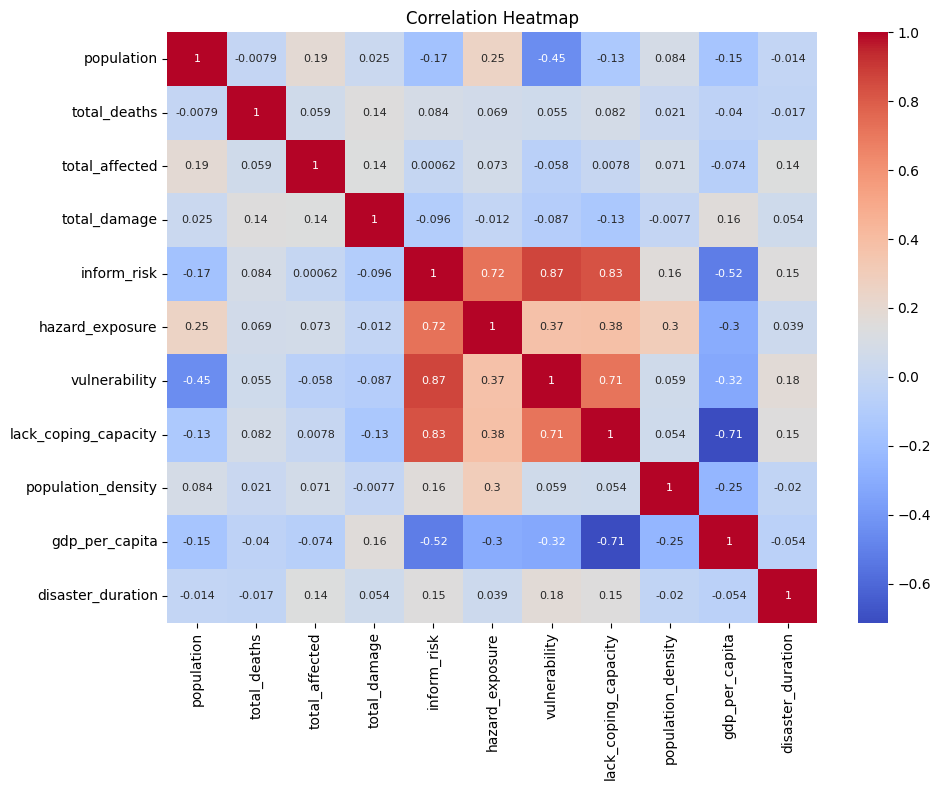

In [ ]:
# Plot Heatmap

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

As shown in the correlation heatmap, the inform_risk feature is highly correlated with lack_coping_capacity, hazard_exposure, and vulnerability. Since inform_risk is essentially a composite of these three components, I decided to drop it from the regression training and analysis to avoid redundancy and multicollinearity.

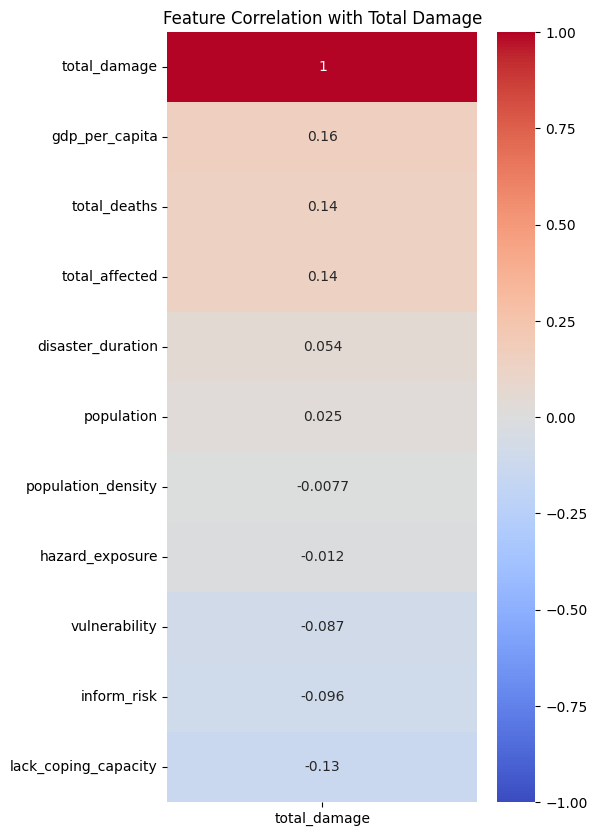

In [ ]:
# Plot Heatmap for Feature Correlation with Total Damage

plt.figure(figsize=(5, 10))
sns.heatmap(corr_matrix[['total_damage']].sort_values(by='total_damage', ascending=False),
            annot=True, cmap='coolwarm', annot_kws={"size": 10}, vmin=-1, vmax=1)
plt.title('Feature Correlation with Total Damage')
plt.show()

# **5. Model Development and Evaluation**

# **5.1. Regression Modeling**

**Goal:**

To predict the total economic damage (in thousands of USD) caused by disasters based on contextual and historical features.

**Why this is useful:**
- Governments can estimate potential financial losses from future disasters
- Insurance companies can better assess risk and plan coverage
- NGOs and international aid organizations can allocate funds more efficiently
- Supports climate adaptation strategies by identifying vulnerable patterns

***In this case, we only focus on Natural Disaster.***

Considerations:
- Data behavior differs: Natural disasters tend to be weather/climate/geography-driven and vary seasonally. Technological disasters (like industrial accidents) may depend on urbanization, infrastructure, or policy.
- Feature importance may shift: hazard_exposure might be crucial for natural disasters, but not for technological ones.
- Imbalanced data risk: Technological disasters are less frequent in this dataset — combining both might lead to a bias toward the more frequent class.
- Improved interpretability: We'll be able to say analyse that (for example) “Among natural disasters, floods are the most likely to become high-impact events”.
- Separate performance tuning: Each group might benefit from different models or thresholds.



---



## **The sources and foundations for the regression models used in this project:**

1. **Linear Regression**
  
  Code Source:
  - Scikit-learn documentation - LinearRegression (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

  - Used .fit() and .predict() directly on the model without tuning (since Linear Regression has minimal hyperparameters)

2. **Random Forest Regressor (Default)**

  Code Source:
  * Scikit-learn documentation - RandomForestRegressor (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)
  * Based on .fit() and .predict() with default parameters.

3. **XGBoost Regressor**

  - Default
      Code Source:
        * XGBoost Python API - XGBRegressor
        * The default instantiation uses parameters like learning_rate=0.3, n_estimators=100, max_depth=6.
  - Fine-tuned
      Code Source:
        * Learned from XGBoost tuning tutorials:
          * Official XGBoost docs (https://xgboost.readthedocs.io/en/stable/parameter.html)
          * Practical guides from machinelearningmastery (https://machinelearningmastery.com/?s=xgboost).


4. **CatBoost Regressor**

  Code Source:
    * LightGBM Python API - LGBMRegressor
    * Best practice tuning from Microsoft's LightGBM GitHub and tutorials:
        * https://github.com/microsoft/LightGBM
        * https://lightgbm.readthedocs.io/en/stable/Parameters.html

5. **Neural Network Regressor - Scikit-learn version (MLPRegressor)**

  Code Source:
    * Scikit-learn documentation - MLPRegressor (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

6. **Evaluation Metrics**

  For MSE, RMSE, R²:
  * Scikit-learn - regression metrics (https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)



---



## **Baseline Model Comparison: Linear Regression**



In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Apply Linear Regression Model
df_reg2 = df_reg2.select_dtypes(include=['float64', 'int64'])
X = df_reg2.drop(columns=['total_damage', 'inform_risk'])
y = df_reg2['total_damage']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% for training, 20% for testing

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)  # Root Mean Squared Error
r2_lr = r2_score(y_test, y_pred)  # R-squared

print(f"Mean Squared Error: {mse_lr}")
print(f"Root Mean Squared Error: {rmse_lr}")
print(f"R-squared: {r2_lr}")

Mean Squared Error: 210359085637991.2
Root Mean Squared Error: 14503761.08593875
R-squared: 0.03228026968393549


RMSE: The average prediction error in the same units as the target (USD 000).

R²:	Proportion of variance in the target explained by the model (0-1 range).

- RMSE (≈ 9 million) might seem "reasonable" in absolute terms, but the R² score (≈ 0.03) tells that this model explains only ~3% of the variance in the target (total_damage).
- The model's predictions are not significantly better than just using the mean of total_damage as a prediction.
- The target variable has huge variance or extreme outliers, making it hard for a linear model to capture relationships.
- Nonlinear relationships - Linear regression can't model curves or thresholds.
- Skewed target - total_damage is very skewed and heavy-tailed.
- Outliers dominate. A few huge damages pull the mean and distort error metrics.

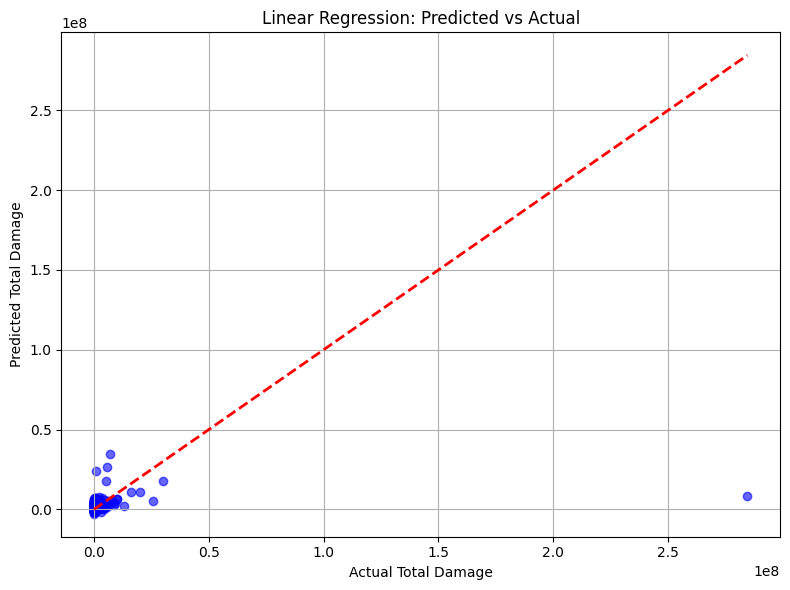

In [ ]:
# visualize the Linear Regression predictions vs actual values

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Total Damage')
plt.ylabel('Predicted Total Damage')
plt.title('Linear Regression: Predicted vs Actual')
plt.grid(True)
plt.tight_layout()
plt.show()

## **Tree-based Model: Random Forest, XGBoost & CatBoost**

In [ ]:
# Import necessary libraries
import numpy as np

# Libraries for tree-based models
from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV
#from sklearn.tree import DecisionTreeRegressor

# For splitting data and model evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

### **Random Forest Regression**

In [ ]:
df_rd = df_reg1.select_dtypes(include=['float64', 'int64'])

# Features and target
X = df_rd.drop(columns=['total_damage', 'inform_risk'])
y = df_rd['total_damage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model using the training data
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_rf}")
print(f"Root Mean Squared Error: {rmse_rf}")
print(f"R-squared: {r2_rf}")

Mean Squared Error: 114348645549993.84
Root Mean Squared Error: 10693392.611795092
R-squared: 0.4739593010777834


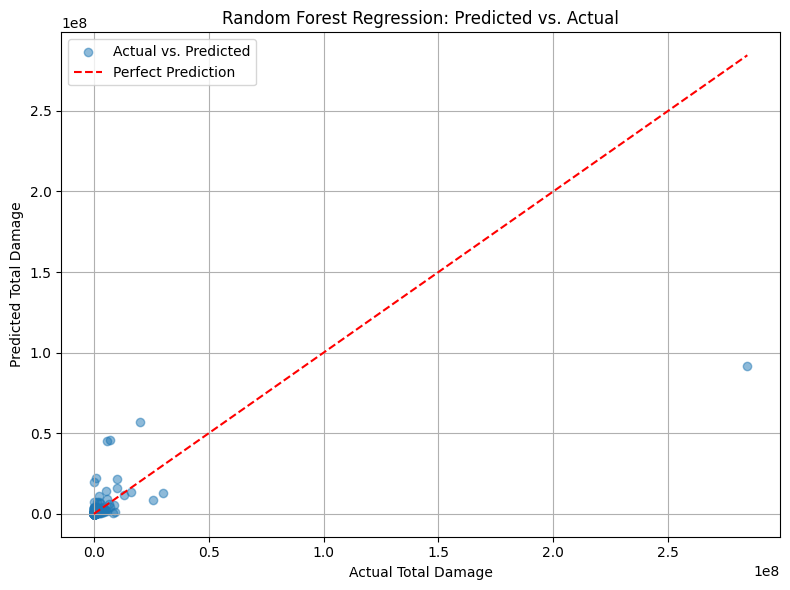

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # alpha for transparency
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Diagonal line for reference
plt.xlabel("Actual Total Damage")
plt.ylabel("Predicted Total Damage")
plt.title("Random Forest Regression: Predicted vs. Actual")
plt.grid(True)
plt.legend(['Actual vs. Predicted', 'Perfect Prediction'])
plt.tight_layout()
plt.show()

**Interpretation:**

**Moderate Predictive Power (R² ≈ 0.47):**
The model explains about 47% of the variance in total disaster damage. This suggests it captures some meaningful patterns but still leaves over half of the variation unexplained. This could be common in complex, real-world datasets with high variability like disaster damage.

**Error Magnitude (RMSE ≈ 10.7 million):**
On average, the model's predictions are off by roughly $10.7 million USD. This could be considered high — especially if many disaster events have much smaller actual damages.

**Plot Observations:**

- Most points are clustered near the origin, suggesting most disaster cases involve lower total damages.

- A few high-value outliers are pulling the red “perfect prediction” line away from the cluster.

- The scatter of points around the line indicates prediction errors; some underestimations, some overestimations.

In [ ]:
# Random Forest's Feature Importance Score

# Get feature importances
importances = rf_regressor.feature_importances_

# Combine with feature names
feature_importance = pd.Series(importances, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)

print(feature_importance)

total_deaths                        0.337725
gdp_per_capita                      0.167866
total_affected                      0.155648
lack_coping_capacity                0.094393
region_north_america                0.060788
population_density                  0.038091
disaster_duration                   0.037582
month                               0.025612
population                          0.024202
disaster_subgroup_Geophysical       0.020212
year                                0.016363
vulnerability                       0.006480
disaster_subgroup_Meteorological    0.004394
region_eastasia_pacific             0.002942
hazard_exposure                     0.002809
disaster_subgroup_Hydrological      0.002652
region_europe_centralasia           0.001416
region_latinamerica_caribbean       0.000546
disaster_subgroup_Climatological    0.000193
region_middleeast_north_africa      0.000051
region_south_asia                   0.000033
region_subsaharan_africa            0.000004
dtype: flo

These scores represent how much each feature contributes to the model’s decision-making — higher = more important.

Top features:
- total_deaths
- total_affected
- GDP per capita
- population
- lack_coping_capacity

These have the biggest influence on the model’s predictions (likely disaster severity or impact classification).

In [ ]:
print("Min:", df_reg1['total_damage'].min())
print("Max:", df_reg1['total_damage'].max())
print("Median:", df_reg1['total_damage'].median())
print("Mean:", df_reg1['total_damage'].mean())

Min: 13.0
Max: 284465151.0
Median: 143591.0
Mean: 1678890.6711970726


### **Random Forest with log-transformed target**

In [ ]:
# Keep only numeric columns
df_rd = df_reg1.select_dtypes(include=['float64', 'int64'])

# Define features and log-transformed target
X = df_rd.drop(columns=['total_damage', 'inform_risk'])
y = df_rd['total_damage']
y_log = np.log1p(y)  # handles zeros safely

# Split data
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Train Random Forest on log-transformed target
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train_log)

# Predict and reverse log-transform
y_pred_log = rf_regressor.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test_log)

# Evaluate on original scale
mse_rflog = mean_squared_error(y_true, y_pred)
rmse_rflog = np.sqrt(mse_rflog)
r2_rflog = r2_score(y_true, y_pred)

print("Random Forest with Log-Transformed Target")
print(f"Mean Squared Error: {mse_rflog:.2f}")
print(f"Root Mean Squared Error: {rmse_rflog:.2f}")
print(f"R-squared: {r2_rflog:.4f}")


Random Forest with Log-Transformed Target
Mean Squared Error: 186836086242237.12
Root Mean Squared Error: 13668799.74
R-squared: 0.1405


**Interpretations:**

*Performance Got Worse.*

The R² dropped from 0.47 to 0.14, meaning the model explains less variance after the log transformation.

RMSE increased from ~10.7M to ~13.7M, indicating larger average prediction errors.

Random Forests handle skewed data reasonably well, so log-transforming the target may not help — and can sometimes hurt.

**Why This Might Happen?** *(Source: ChatGPT AI)*

Log transformation is useful when the target variable is heavily skewed, but:

If the features weren't transformed accordingly or

The back-transformation (np.expm1) introduced nonlinearity that the model struggled with, then performance may suffer.



### **XGBoost Regression**

In [ ]:
# Import libraries

import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

XGBoost Regression Results
MSE: 46339333284240.18
RMSE: 6807299.999576938
R²: 0.786824101403337


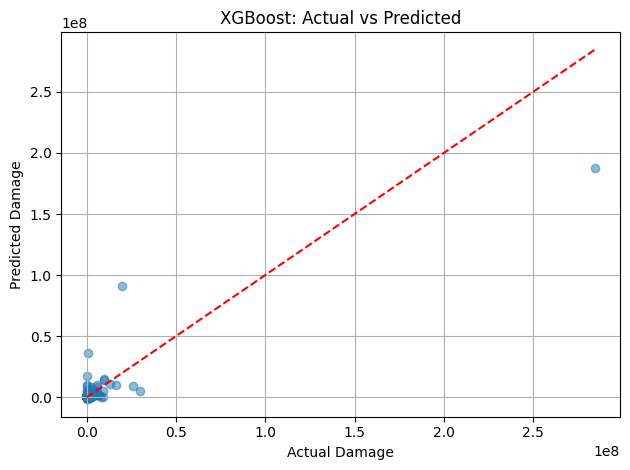

In [ ]:
# XGBoost with Default Hyperparameters

# Select only numeric features (if needed)
df_reg1 = df_reg1.select_dtypes(include=['float64', 'int64'])

# Define features and target
X = df_reg1.drop(columns=['total_damage','inform_risk'])
y = df_reg1['total_damage']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

# Predict
y_pred = xgb.predict(X_test)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred)

print("XGBoost Regression Results")
print("MSE:", mse_xgb)
print("RMSE:", rmse_xgb)
print("R²:", r2_xgb)

# Plot actual vs. predicted
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Damage")
plt.ylabel("Predicted Damage")
plt.title("XGBoost: Actual vs Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()


**Interpretation:**

**Strong Predictive Power (R² ≈ 0.79)**

The model explains nearly 79% of the variance in total disaster damage, a significant improvement over previous models. This means XGBoost captures most of the patterns in the data and generalizes well across examples.

**Lower RMSE (~6.8M)**

Compared to Random Forest (RMSE ≈ 10.7M), XGBoost makes more accurate predictions on average, with errors roughly $6.8M. That's a solid improvement considering the scale of the damages.

**Scatter Plot Insights:**

Most data points are clustered near the bottom left (might be typical in disaster datasets where many events cause low-to-moderate damage).

The red dashed line shows the perfect prediction line, and this predictions closely follow it with relatively small deviation, except for a few high-damage cases.

XGBoost handles these outliers better than Random Forest and shows less underestimation.

### **XGBoost Regression with Tuned Hyperparameters**

XGBoost (Tuned) Regression Performance:
MSE: 36445385285835.54
RMSE: 6037001.348834994
R²: 0.8323394574895213


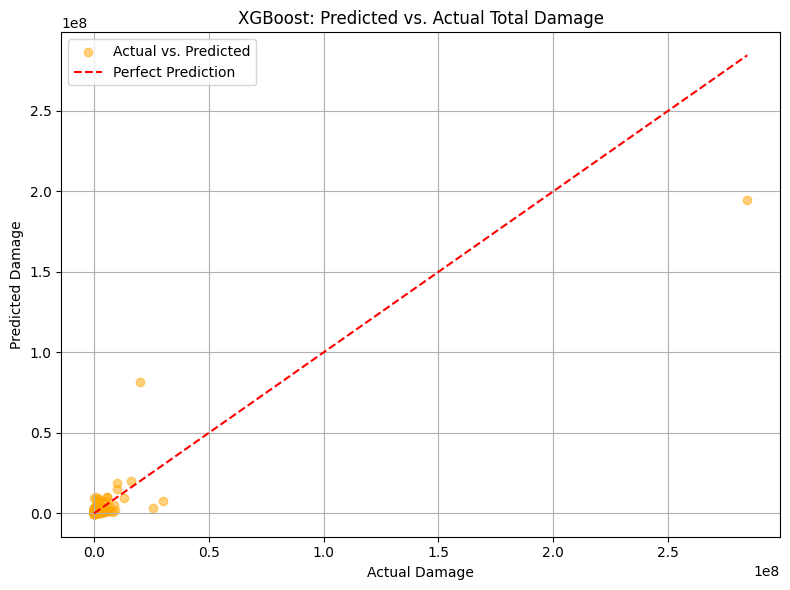

In [ ]:
# XGBoost Regression with Tuned Hyperparameters

# Fetch data
df_reg1 = df_reg1.select_dtypes(include=['float64', 'int64'])

# Features and target
X = df_reg1.drop(columns=['total_damage', 'inform_risk'])
y = df_reg1['total_damage']


# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=200,            # Number of boosting rounds (trees)
    learning_rate=0.2,           # Step size shrinkage (0.2 is moderate, helps prevent overfitting)
    max_depth=10,                # Maximum tree depth (higher can overfit)
    subsample=1,                 # Fraction of training data used per tree (1 = use all)
    colsample_bytree=1,          # Fraction of features used per tree (1 = use all)
    objective='reg:squarederror',# Loss function: squared error for regression -  Optimizes for RMSE (default)
    random_state=42              # For reproducibility
)

xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb_model.predict(X_test)

mse_xgbtuned = mean_squared_error(y_test, y_pred)
rmse_xgbtuned = np.sqrt(mse_xgbtuned)
r2_xgbtuned = r2_score(y_test, y_pred)

print("XGBoost (Tuned) Regression Performance:")
print("MSE:", mse_xgbtuned)
print("RMSE:", rmse_xgbtuned)
print("R²:", r2_xgbtuned)

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Damage')
plt.ylabel('Predicted Damage')
plt.title('XGBoost: Predicted vs. Actual Total Damage')
plt.legend(['Actual vs. Predicted', 'Perfect Prediction'])
plt.grid(True)
plt.tight_layout()
plt.show()

***Hyperparameters Explanation:***

n_estimators=200: This determines the number of decision trees (boosting rounds) in the XGBoost model. More trees can lead to better performance but can also increase training time and the model's complexity. In this code, 200 trees are used.

learning_rate=0.2: Controls how much each tree's contribution is scaled down. It's like taking smaller steps towards the solution, and this can improve model accuracy but might need more trees. Here, a learning rate of 0.2 is chosen.

max_depth=10: Defines the maximum depth of each tree in the XGBoost model. Deeper trees can capture more complex relationships but are also prone to overfitting (memorizing the training data too well). In this case, the depth is 10.

subsample=1: Specifies the fraction of the training data (rows or samples) to be used for each tree. It can help with preventing overfitting and reducing training time. Here, 100% of the data is used per tree.

colsample_bytree=1: Defines the fraction of features to use for each tree. Similar to subsample, this introduces randomness to the feature selection at each tree, improving model robustness and generalizability. Here, 100% of features are used per tree.

random_state=42: A seed value used for random number generation. This ensures that the results are reproducible, meaning if we run the code multiple times, we'll get the same model if no data changes have been made.





---



We have tested more regularized versions (with subsampling and lower learning rate), but this dataset seems to:

- Benefit from deep, full trees
- Not overfit, despite the small size

**Result Interpretation:**

**Excellent Predictive Power (R² ≈ 0.83)**

The model explains over 83% of the variation in total disaster damage; the best performance so far. This means the model has learned strong patterns in the data and is making predictions that closely match actual values.

**Lowest RMSE (~6.0M)**

This model gives the smallest average error among all the previous models, meaning it predicts total damage more accurately than Linear Regression, Random Forest, or even the default XGBoost version.

**Improvement Over Default**

R² improved from 0.79 to 0.83

RMSE decreased from ~6.8M to ~6.0M

This shows that hyperparameter tuning paid off, helping the model generalize better and fit the data more effectively.


In [ ]:
# XGBoost's Feature Importance Score

# Get feature importances
importances = xgb.feature_importances_

# Combine with feature names
feature_importance = pd.Series(importances, index=X_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)

print(feature_importance)

lack_coping_capacity                0.523401
disaster_subgroup_Geophysical       0.128853
total_deaths                        0.111539
gdp_per_capita                      0.076836
total_affected                      0.071117
disaster_duration                   0.016911
population                          0.011822
region_north_america                0.010239
month                               0.007563
vulnerability                       0.006524
year                                0.006234
disaster_subgroup_Hydrological      0.005507
region_europe_centralasia           0.005362
disaster_subgroup_Meteorological    0.004834
population_density                  0.003901
region_eastasia_pacific             0.003638
disaster_subgroup_Climatological    0.001747
hazard_exposure                     0.001483
region_south_asia                   0.001481
region_latinamerica_caribbean       0.000815
region_middleeast_north_africa      0.000193
region_subsaharan_africa            0.000000
dtype: flo

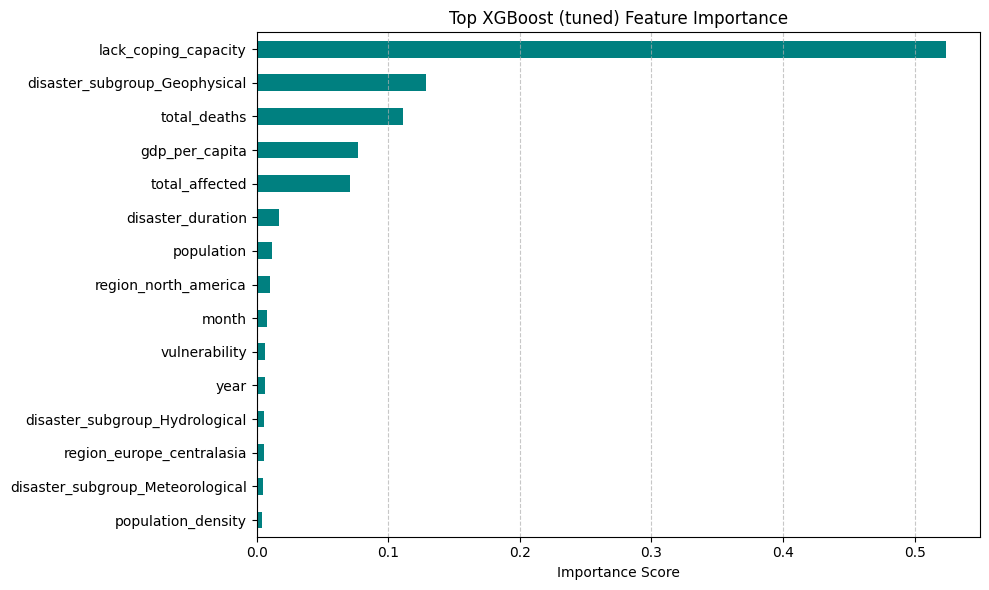

In [ ]:
import matplotlib.pyplot as plt

# Sort and select top features
top_features = feature_importance.head(15)  # or .nlargest(15)

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh', color='teal')
plt.title("Top XGBoost (tuned) Feature Importance")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()  # Highest on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Most Influential Features**

**lack_coping_capacity (52%)**

This is the most important feature. It suggests that the ability (or inability) of a country to cope with disasters has the biggest impact on predicting total damage. Countries with weak infrastructure and emergency systems may suffer higher losses.

**disaster_subgroup_Geophysical (13%)**

Geophysical events such as earthquakes, tsunamis, have high cost impacts, which aligns with real-world trends.

**total_deaths (11%)**

High death tolls often indicate severe events and are likely correlated with economic damage.

**gdp_per_capita & total_affected (7-8%)**

GDP indicates wealth (and potential asset loss), while affected population captures event scale.

**Moderately Important**

disaster_duration, population, and regional features.
These contribute modestly to predictions. Longer disasters and highly populated regions likely increase losses.

**Least Important**

region_subsaharan_africa, region_middleeast_north_africa, and hazard_exposure.
These had very low or even zero importance; possibly due to underrepresentation or overlap with more dominant features like lack_coping_capacity.

### **Catboost (Categorical Boosting)**

Gradient boosting decision tree (GBDT) - developed by Yandex. Like XGBoost, it builds decision trees sequentially to reduce errors. It's designed specifically to handle categorical features automatically.

In [ ]:
pip install -U catboost

In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define features and target
X = df_feature.drop(columns=['total_damage','inform_risk', 'start_date', 'end_date', 'disaster_group',
                             'disaster_type', 'disaster_subtype', 'iso', 'country', 'risk_class', 'is_outlier', 'is_outlier_IQR'])
y = df_feature['total_damage']

# Identify categorical columns in X
cat_features = X.select_dtypes(include='object').columns.tolist()

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create CatBoost Pool with categorical feature names
train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, y_test, cat_features=cat_features)

# Train the model
model_cat = CatBoostRegressor(
    iterations=500,         # Total number of boosting rounds (trees). Higher can improve accuracy, but may overfit.
    learning_rate=0.1,      # Step size for each iteration. Lower values can increase accuracy but require more iterations.
    depth=4,                # Depth of each tree. Lower values reduce overfitting, higher may capture more complexity.
    loss_function='RMSE',   # Objective function the model tries to minimize — here, Root Mean Squared Error.
    eval_metric='R2',       # Metric used to evaluate performance on the validation set — here, R² score.
    random_seed=42,         # Ensures reproducibility of results.
    verbose=100             # Print training progress every 100 iterations (useful for tracking convergence).
)

model_cat.fit(train_pool, eval_set=test_pool)

# Make predictions and evaluate
y_pred = model_cat.predict(X_test)

mse_catb = mean_squared_error(y_test, y_pred)
rmse_catb = np.sqrt(mse_catb)
r2_catb = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse_catb:.2f}")
print(f"Root Mean Squared Error: {rmse_catb:.2f}")
print(f"R² Score: {r2_catb:.2f}")


0:	learn: 0.0545251	test: 0.0024249	best: 0.0024249 (0)	total: 1.65ms	remaining: 825ms
100:	learn: 0.7621501	test: 0.4930511	best: 0.4961339 (94)	total: 128ms	remaining: 505ms
200:	learn: 0.8995570	test: 0.5895947	best: 0.5895947 (200)	total: 377ms	remaining: 562ms
300:	learn: 0.9456626	test: 0.6231698	best: 0.6231698 (300)	total: 538ms	remaining: 355ms
400:	learn: 0.9619429	test: 0.6170908	best: 0.6231698 (300)	total: 661ms	remaining: 163ms
499:	learn: 0.9698665	test: 0.6217884	best: 0.6231698 (300)	total: 800ms	remaining: 0us

bestTest = 0.6231697929
bestIteration = 300

Shrink model to first 301 iterations.
Mean Squared Error: 81913858951514.50
Root Mean Squared Error: 9050627.54
R² Score: 0.62


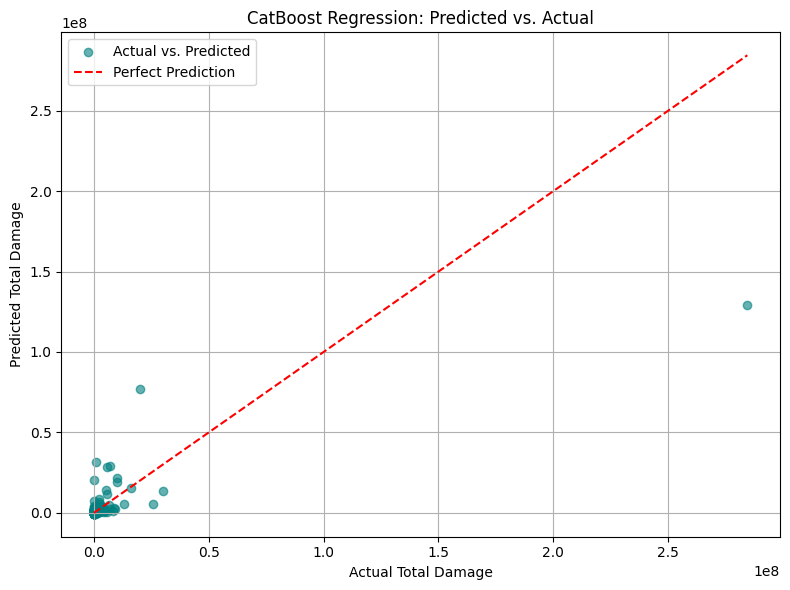

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal', label="Actual vs. Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Perfect Prediction")
plt.title("CatBoost Regression: Predicted vs. Actual")
plt.xlabel("Actual Total Damage")
plt.ylabel("Predicted Total Damage")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation:**

CatBoost performed better than most traditional models, capturing more variance.

**Good Predictive Strength (R² ≈ 0.62):**

The model explains about 62% of the variation in disaster damage, which is a good performance. It's better than Random Forest (R² = 0.47) result.

**Moderate Prediction Error (RMSE ≈ $9M):**

While not as low as XGBoost (~$6M), CatBoost still delivers reasonably accurate predictions.

**Early Stopping Activated at 300 Iterations:**

The model found its optimal performance before completing all 500 iterations, which helped avoid overfitting.



## Neural Network

Neural Network (sklearn MLPRegressor) - a Multilayer Perceptron (MLP) used for regression tasks.

sklearn.neural_network.MLPRegressor



In [ ]:
# Import libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Keep only numeric columns
df_reg1 = df_reg1.select_dtypes(include=['float64', 'int64'])

# Make sure 'total_damage' and 'inform_risk' exist after filtering
assert 'total_damage' in df_reg1.columns, "Missing 'total_damage' column"
assert 'inform_risk' in df_reg1.columns, "Missing 'inform_risk' column"

# Define features and target
X = df_reg1.drop(columns=['total_damage', 'inform_risk'])  # drop target + excluded feature
y = df_reg1['total_damage']

# Log-transform the target
y_log = np.log1p(y)  # handles 0s safely

# Train/test split
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train the neural network
model = MLPRegressor(
    hidden_layer_sizes=(64, 32),     # deeper network for capturing complex patterns
    activation='relu',               # commonly effective for regression
    solver='adam',                   # adaptive optimizer
    alpha=0.0005,                    # L2 penalty to reduce overfitting
    learning_rate='adaptive',        # adjusts learning rate when performance stalls
    learning_rate_init=0.1,          # smaller step size than 0.01
    max_iter=2000,                   # allow more iterations for convergence
    early_stopping=True,
    validation_fraction=0.2,
    n_iter_no_change=20,             # more patience before stopping
    random_state=42)

model.fit(X_train_scaled, y_train_log)

# Predict and inverse log1p
y_pred_log = model.predict(X_test_scaled)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test_log)

# Evaluate
mse_nn = mean_squared_error(y_true, y_pred)
rmse_nn = np.sqrt(mse_nn)
r2_nn = r2_score(y_true, y_pred)

print("Model Evaluation:")
print(f"Mean Squared Error: {mse_nn:.2f}")
print(f"RMSE: {rmse_nn:.2f}")
print(f"R² Score: {r2_nn:.4f}")

Model Evaluation:
Mean Squared Error: 209178092060085.31
RMSE: 14462990.43
R² Score: 0.0377


The neural network performed worse likely  because this model is generally not ideal for small datasets with fewer than 2,000 rows - like in this project, which has around 1,900 rows.

**Notes:**

Why Neural Networks Struggle with Small Data: *(Source: ChatGPT AI)*

- Too Many Parameters
Neural nets have a lot of weights to learn. With limited data, they can easily overfit (memorize) rather than generalize.

- Sensitive to Noise & Outliers
Small datasets often contain noise or outliers that heavily affect NN training.

- Require Feature Scaling & Tuning
Neural nets demand careful feature scaling, learning rate selection, and architecture tuning — which is harder with little data.



---



## **Model Evaluation Comparison**

In [ ]:
import plotly.graph_objects as go

# Metrics
results = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Random Forest (Default)",
        "Random Forest (Log Target)",
        "XGBoost (Default)",
        "XGBoost (Tuned)",
        "CatBoost",
        "Neural Network"],
    "MSE": [mse_lr, mse_rf, mse_rflog, mse_xgb, mse_xgbtuned, mse_catb, mse_nn],
    "RMSE": [rmse_lr, rmse_rf, rmse_rflog, rmse_xgb, rmse_xgbtuned, rmse_catb, rmse_nn],
    "R²": [r2_lr, r2_rf, r2_rflog, r2_xgb, r2_xgbtuned, r2_catb, r2_nn],
    "Performance": ["Low", "Medium", "Low", "Good", "Best", "Good", "Low"],
    "Speed": ["Fast", "Medium", "Medium", "Medium", "Slow-Medium", "Slow-Medium", "Slow"],
    "Complexity": ["Low", "Medium", "Medium", "High", "High", "High", "High"]
})

# Format cells
formatted_cells = [
    results["Model"],
    [f"{x:,.2f}" for x in results["MSE"]],
    [f"{x:,.2f}" for x in results["RMSE"]],
    [f"{x:.2f}" for x in results["R²"]],
    results["Performance"],
    results["Speed"],
    results["Complexity"]
]

# Create Plotly Table
fig = go.Figure(data=[go.Table(
    columnwidth=[100, 100, 70, 60, 70, 70, 70],
    header=dict(values=list(results.columns),
                fill_color='lightskyblue',
                align='center',
                font=dict(size=18),
                line_color='darkgray'),
    cells=dict(values=formatted_cells,
               fill_color='white',
               align='left',
               font=dict(size=16),
               line_color='lightgray'))
])

fig.update_layout(title=dict(text="Model Comparison: Metrics, Performance, Speed, and Complexity</b>", x=0.5, font=dict(size=20)),
                  #margin=dict(l=20, r=20, t=50, b=20),
                  #width=1300,
                  height=450)
fig.show()

**Observations:**

1. XGBoost (Tuned) is clearly the best performer (R2 = 0.83). It achieves the lowest error and best explanatory power.

2. XGBoost (Default) performs nearly as well as the tuned version. Indicates XGBoost is naturally strong, even with default hyperparameters.

3. Boosted trees (XGBoost, CatBoost) outperform traditional Random Forest and linear models.

4. Neural Networks and Linear Regression perform poorly. Likely due to the nonlinear nature of the data and small sample size.

5. Default Random Forest shows modest performance. Log transformation actually degraded performance. It may have distorted variance structure. It may not be appropriate here; it hurt performance.

**Best Result: XGBoost - tuned.**

- An RMSE of $6M is relatively low given the scale of damages we're modeling (some disasters cost tens or hundreds of millions).
- An R² above 0.8 is considered strong in regression problems, especially with real-world, noisy data.



---


---




# **5.2. Detecting Anomalies (Economic Outliers) Using Clustering Method (HDBSCAN)**

## **HDBScan (Hierarchical Density-Based Spatial Clustering of Applications with Noise)**

**Goal:** Find disasters with damage that is disproportionate to their expected scale.

**Sources:**

HDBSCAN Official Documentation and GitHub
* https://hdbscan.readthedocs.io/en/latest/
* https://github.com/scikit-learn-contrib/hdbscan

I used these to ensure correct parameter usage (min_cluster_size, prediction_data=True, probabilities_, etc.), and for practical examples like clustering + visualization (PCA/t-SNE).



---



In [ ]:
# Import requirements

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)

# Prepare the data
# Select the important features
X = df_reg1[['total_damage', 'total_deaths', 'total_affected', 'gdp_per_capita', 'population', 'population_density', 'disaster_duration', 'inform_risk',
            'disaster_subgroup_Climatological', 'disaster_subgroup_Geophysical', 'disaster_subgroup_Hydrological',
            'disaster_subgroup_Meteorological', 'region_eastasia_pacific', 'region_europe_centralasia', 'region_latinamerica_caribbean',
            'region_middleeast_north_africa', 'region_north_america', 'region_south_asia', 'region_subsaharan_africa']]

            # Higher inform_risk → the country/region is more at risk of crisis from disasters.

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, prediction_data=True) # min cluster size = the smallest meaningful group of similar events I want to detect.
#clusterer = hdbscan.HDBSCAN(min_cluster_size=10, prediction_data=True)
labels = clusterer.fit_predict(X_scaled)

# Add results to DataFrame
df_hdb = X.copy()
df_hdb['cluster'] = labels
df_hdb['anomaly'] = labels == -1  # HDBSCAN labels noise as -1
df_hdb['probability'] = clusterer.probabilities_

# Show anomaly count
# print only rows where anomaly is TRUE
display(df_hdb[df_hdb['anomaly'] == True])
print(f"HDBSCAN detected {df_hdb['anomaly'].sum()} anomalies out of {len(df_hdb)} records.")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



total_damage  total_deaths  total_affected  gdp_per_capita  \
9         159252.0           1.0           200.0    21870.415967   
31        283114.0         347.0       3448053.0      296.426688   
33         76087.0         867.0      22000000.0      442.750219   
51      13164812.0          18.0        360110.0    39169.359570   
52       1223584.0         884.0      24600000.0      442.750219   
...            ...           ...             ...             ...   
1887       10412.0         146.0        349122.0     1046.240845   
1901     4372889.0         603.0       2802500.0     2139.374785   
1903     1353513.0           2.0        102000.0    64997.013654   
1909      260291.0           2.0            12.0    78035.175360   
1912     1041164.0          18.0           717.0    78035.175360   

        population  population_density  disaster_duration  inform_risk  \
9     1.901796e+07            2.476967                 15          2.3   
31    1.211884e+07           70.600136                 30          4.3   
33    1.059634e+09          355.820763                 28          5.2   
51    1.268039e+08          347.991770                  7          2.2   
52    1.059634e+09          355.820763                 33          5.2   
...            ...                 ...                ...          ...   
1887  4.687420e+07           26.436481                143          7.2   
1901  2.185412e+08          245.013446                122          6.6   
1903  2.617741e+07            3.381998                 16          2.3   
1909  3.382899e+08           36.433378                  1          3.2   
1912  3.382899e+08           36.433378                 90          3.2   

      disaster_subgroup_Climatological  disaster_subgroup_Geophysical  ...  \
9                                    0                              0  ...   
31                                   0                              0  ...   
33                                   0                              0  ...   
51                                   0                              0  ...   
52                                   0                              0  ...   
...                                ...                            ...  ...   
1887                                 0                              0  ...   
1901                                 0                              0  ...   
1903                                 0                              0  ...   
1909                                 0                              1  ...   
1912                                 0                              0  ...   

      region_eastasia_pacific  region_europe_centralasia  \
9                           1                          0   
31                          1                          0   
33                          0                          0   
51                          1                          0   
52                          0                          0   
...                       ...                        ...   
1887                        0                          0   
1901                        0                          0   
1903                        1                          0   
1909                        0                          0   
1912                        0                          0   

      region_latinamerica_caribbean  region_middleeast_north_africa  \
9                                 0                               0   
31                                0                               0   
33                                0                               0   
51                                0                               0   
52                                0                               0   
...                             ...                             ...   
1887                              0                               0   
1901                              0                               0   
190

HDBSCAN detected 189 anomalies out of 1913 records.


Probability = 0.0 --> the point is classified as noise (anomaly) — not assigned to any cluster.

These points are:

- Not part of any cluster

- Too isolated, low-density, or disconnected to belong

- The most “anomalous” in the dataset

In [ ]:
# Check the total number of clusters
total_cluster = df_hdb['cluster'].nunique()
print(f"Total number of clusters: {total_cluster}")
print(pd.Series(df_hdb['cluster'].unique()).sort_values().tolist())

Total number of clusters: 28
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


0, 1, 2, ..., 23 --> Valid clusters

-1 --> Anomalies or Noise (These are points that don't belong to any cluster).

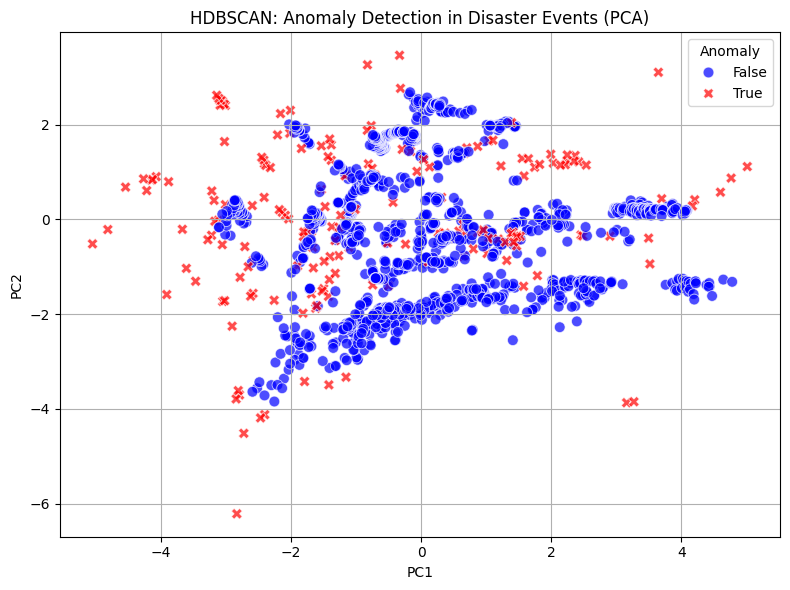

In [ ]:
# Visualize high-dimensional data in 2D

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled) # PCA-transformed data; a matrix of reduced dimensions

df_hdb['PC1'] = X_pca[:, 0] # the first principal component (PC1)
df_hdb['PC2'] = X_pca[:, 1] # the second principal component (PC2)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_hdb, x='PC1', y='PC2',
    hue='anomaly', palette={True: 'red', False: 'blue'}, style='anomaly', alpha=0.7, s=60)
plt.title("HDBSCAN: Anomaly Detection in Disaster Events (PCA)")
plt.legend(title='Anomaly')
plt.grid(True)
plt.tight_layout()
plt.show()

#display(df_hdb['PC1'])

In [ ]:
# Display Top 10 Anomalies with the Highest Total Damage
top_anomalies = df_hdb[df_hdb['anomaly'] == True].sort_values('total_damage', ascending=False)
display(top_anomalies.head(10))

total_damage  total_deaths  total_affected  gdp_per_capita  \
879    284465151.0       19846.0        368820.0    48760.078949   
441    195029889.0        1833.0        500000.0    44123.399647   
671    120294216.0       87476.0      45976596.0     3468.327063   
1509   118091963.0          88.0        582024.0    60322.261424   
1822    73091612.0          96.0         14000.0    71318.307359   
1516    70855178.0          97.0         70000.0    60322.261424   
907     54183838.0         813.0       9500000.0     5373.623283   
1363    48242988.0           9.0        120800.0    39375.473162   
373     45168877.0          40.0         62183.0    38298.980171   
1808    44979453.0         226.0          1000.0    52265.654162   

        population  population_density  disaster_duration  inform_risk  \
879   1.280073e+08          350.707819                  1          2.2   
441   2.968427e+08           32.254877                 21          3.2   
671   1.330167e+09          141.097705                  1          3.0   
1509  3.297912e+08           35.542495                  4          3.2   
1822  3.369976e+08           36.299741                  5          3.2   
1516  3.297912e+08           35.542495                 18          3.2   
907   6.871285e+07          135.072536                152          4.4   
1363  1.269939e+08          348.631001                  1          2.2   
373   1.276713e+08          350.510288                  1          2.2   
1808  8.340855e+07          238.118086                  3          2.4   

      disaster_subgroup_Climatological  disaster_subgroup_Geophysical  ...  \
879                                  0                              1  ...   
441                                  0                              0  ...   
671                                  0                              1  ...   
1509                                 0                              0  ...   
1822                                 0                              0  ...   
1516                                 0                              0  ...   
907                                  0                              0  ...   
1363                                 0                              1  ...   
373                                  0                              1  ...   
1808                                 0                              0  ...   

      region_latinamerica_caribbean  region_middleeast_north_africa  \
879                               0                               0   
441                               0                               0   
671                               0                               0   
1509                              0                               0   
1822                              0                               0   
1516                              0                               0   
907                               0                               0   
1363                              0                               0   
373                               0                               0   
1808                              0                               0   

      region_north_america  region_south_asia  region_subsaharan_africa  \
879                      0                  0                         0   
441                      1                  0                         0   
671                      0                  0                         0   
1509                     1                  0                         0   
1822                     1                  0                         0   
1516                     1                  0                         0   
907                      0                  0                         0   
1363                     0                  0                         0   
373                      0                  0                         0   
1808                     0                  0      

In [ ]:
# Merge anomaly results with original data for context
df_cluster = pd.merge(df_feature, df_hdb[['cluster', 'anomaly']], left_index=True, right_index=True, how='left')

# Show top 10 damage of detected anomalies
display(df_cluster[df_cluster['anomaly']].sort_values('total_damage', ascending = False).head(10))

start_date   end_date disaster_group disaster_subgroup disaster_type  \
879  2011-03-11 2011-03-11        Natural       Geophysical    Earthquake   
441  2005-08-29 2005-09-19        Natural    Meteorological         Storm   
671  2008-05-12 2008-05-12        Natural       Geophysical    Earthquake   
1509 2017-08-25 2017-08-29        Natural    Meteorological         Storm   
1822 2021-08-28 2021-09-02        Natural    Meteorological         Storm   
1516 2017-09-10 2017-09-28        Natural    Meteorological         Storm   
907  2011-08-05 2012-01-04        Natural      Hydrological         Flood   
1363 2016-04-14 2016-04-14        Natural       Geophysical    Earthquake   
373  2004-10-23 2004-10-23        Natural       Geophysical    Earthquake   
1808 2021-07-12 2021-07-15        Natural      Hydrological         Flood   

      disaster_subtype  iso                   country    year  month  ...  \
879            Tsunami  jpn                     Japan  2011.0    3.0  ...   
441   Tropical cyclone  usa  United States of America  2005.0    8.0  ...   
671    Ground movement  chn                     China  2008.0    5.0  ...   
1509  Tropical cyclone  usa  United States of America  2017.0    8.0  ...   
1822  Tropical cyclone  usa  United States of America  2021.0    8.0  ...   
1516  Tropical cyclone  usa  United States of America  2017.0    9.0  ...   
907     Riverine flood  tha                  Thailand  2011.0    8.0  ...   
1363   Ground movement  jpn                     Japan  2016.0    4.0  ...   
373    Ground movement  jpn                     Japan  2004.0   10.0  ...   
1808   Flood (General)  deu                   Germany  2021.0    7.0  ...   

      vulnerability  lack_coping_capacity  population_density  gdp_per_capita  \
879             1.4                   1.4          350.707819    48760.078949   
441             3.2                   2.0           32.254877    44123.399647   
671             1.6                   3.2          141.097705     3468.327063   
1509            3.2                   2.0           35.542495    60322.261424   
1822            3.2                   2.0           36.299741    71318.307359   
1516            3.2                   2.0           35.542495    60322.261424   
907             3.8                   3.9          135.072536     5373.623283   
1363            1.4                   1.4          348.631001    39375.473162   
373             1.4                   1.4          350.510288    38298.980171   
1808            3.8                   1.6          238.118086    52265.654162   

      disaster_duration                 region  is_outlier  is_outlier_IQR  \
879                   1    East Asia & Pacific       False           False   
441                  21          North America       False           False   
671                   1    East Asia & Pacific        True            True   
1509                  4          North America       False           False   
1822                  5          North America       False           False   
1516                 18          North America       False           False   
907                 152    East Asia & Pacific       False            True   
1363                  1    East Asia & Pacific       False           False   
373                   1    East Asia & Pacific       False           False   
1808                  3  Europe & Central Asia       False           False   

      cluster  anomaly  
879        -1     True  
441        -1     True  
671        -1     True  
1509       -1     True  
1822       -1     True  
1516       -1     True  
907        -1     True  
1363       -1     True  
373        -1     True  
1808       -1     True  

[10 rows x 27 columns]

In [ ]:
df_cluster.duplicated().sum()

np.int64(0)

**Interpretations:**

**Notable Economic Anomalies:**

1. **Japan (Index 710, 1092, 281)**

  2011 Tsunami: Highest cost disaster globally ($284B), with high fatalities. Makes sense due to nuclear incident and urban destruction.

  2004 & 2016 Earthquakes: Relatively low human impact, yet USD 45B-48B in damages; likely due to expensive infrastructure.

  Takeaway: Japan's high vulnerability to asset loss, not always reflected in traditional risk indicators.

2. **USA Hurricanes (Indexes 340, 1216, 1502, 1222)**

  Hurricane Katrina (2005): High deaths & damage.

  Harvey, Irma, Ida: Extremely costly despite low deaths—shows how urban flooding & insurance valuation inflate cost.

  Takeaway: In high-income countries, economic damage is not always aligned with death toll or affected count.

3. **Germany (Index 1488)**

  2021 Flood: Only 1,000 people affected, yet $45B in damage—extraordinary case of infrastructure loss in a high-income, low-risk country.

  Takeaway: Unusual case; high cost but fewer people impacted, or the other way around.

4. **Thailand (Index 731)**

  $54B damage for 9.5 million affected. Massive flood with high death toll (813). Stands out for a middle-income country.

  Takeaway: this is an economic anomaly due to its massive $54B damage in a mid-risk, middle-income country, might revealing hidden vulnerabilities in global supply chains and urban infrastructure.



---


**From this top 10 damage list, the anomaly detection using HDBSCAN focus on:**

- Disasters with unusually high damage despite low affected population (Japan, Germany).

- Disasters in low-risk areas with unexpectedly large losses (Germany, Japan)

- Events with very high deaths + high damage (China's earthquake)

In [ ]:
# Keep only the highest damage anomaly per country
top_by_country = df_cluster.sort_values('total_damage', ascending=False).drop_duplicates('country')
top_by_country = top_by_country.head(20).reset_index(drop=True)

#top_by_country = df_cluster.sort_values('total_damage', ascending=False).drop_duplicates('country').head(15).reset_index(drop=True)


In [ ]:
import plotly.express as px

# Create hover label
top_by_country['hover'] = (
    top_by_country['country'] + " (" +
    top_by_country['year'].astype(str) + ")<br>" +
    "Disaster: " + top_by_country['disaster_type'] + "<br>" +
    "Damage: $" + top_by_country['total_damage'].apply(lambda x: f"{x:,.0f}") + "k<br>" +
    "Affected: " + top_by_country['total_affected'].apply(lambda x: f"{x:,.0f}") + " people<br>" +
    "INFORM Risk: " + top_by_country['inform_risk'].astype(str)
)

# Plot map
fig = px.scatter_geo(
    top_by_country,
    locations="country",
    locationmode="country names",
    size="total_damage",
    color="disaster_type",
    hover_name="country",
    hover_data={'total_damage': False, 'total_affected': False, 'hover': True},
    projection="natural earth",
    title="Top Disaster Anomalies (Max Damage per Country)",
)

fig.update_traces(marker=dict(line=dict(width=0.5, color='black')))
fig.update_layout(legend_title_text='Disaster Type', geo=dict(showframe=False, showcoastlines=True))

fig.show()


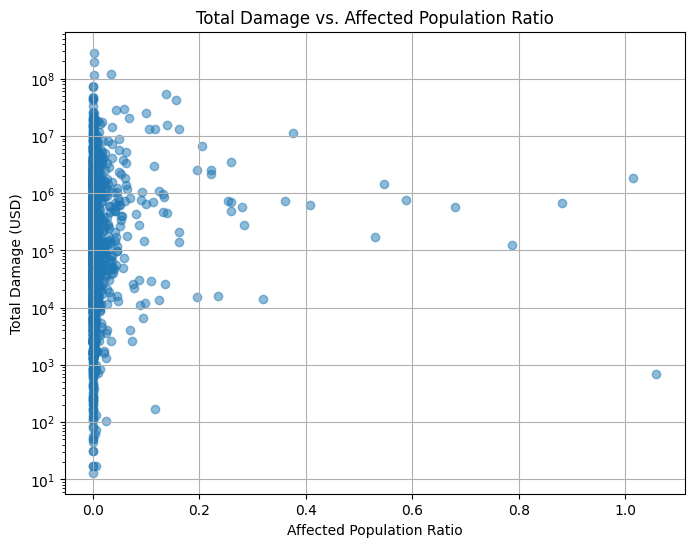

In [ ]:
# Analyze total_damage vs. affected_population

# Create a new column for affected population if it doesn't exist
df_cluster['affected_ratio'] = df_cluster['total_affected'] / df_cluster['population']

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df_cluster['affected_ratio'], df_cluster['total_damage'], alpha=0.5)
plt.xlabel('Affected Population Ratio')
plt.ylabel('Total Damage (USD)')
plt.title('Total Damage vs. Affected Population Ratio')
plt.grid(True)
plt.yscale('log') # for better feasibility
plt.show()

**Key Observations:**
- High economic damage can occur even with low population impact.
- Most disasters affect a small proportion of the population.
- A few rare disasters affect large population. But despite large impact, most have moderate total damage (not the highest).
- No clear linear or exponential trend. The relationship is nonlinear, meaning we can't predict damage just from population affected. Other features such as: economic development, infrastructure, and event type matter.

# **6. Ethical Considerations and Limitations**

1. **Data Bias and Fairness**

  **Incomplete Reporting Bias:** This project only includes disaster records with complete information for all selected features. Rows with any null values were omitted, which may exclude less-documented disasters or regions with weaker reporting infrastructure.

  **Damage Threshold Filtering:** Disasters with reported total damage below 10,000 ('000 USD) were excluded to remove unreasonably low values (e.g., $3). However, this may filter out smaller-scale but locally significant disasters.

  **Regional Imbalance:** The dataset may overrepresent countries with robust disaster tracking systems and underrepresent low-income or conflict-affected regions.

  **Mitigation Strategies:** Be transparent about preprocessing criteria, acknowledge underrepresentation, and consider adding weighting schemes or additional datasets in future iterations.

2. **Model Fairness**

  **Socioeconomic Feature Impact:** Features like GDP per capita, coping capacity, and vulnerability are influenced by unequal systems or structures. Model predictions may reflect these biases.

  **Risk:** May lead to lower predicted damages in low-income areas not due to actual resilience, but due to underreporting or undervaluation.

  **Mitigation:** Communicate these risks clearly and avoid using model outputs as the sole basis for resource allocation.

3. **Interpretability and Transparency**

  **Issue:** Models like XGBoost, CatBoost, and/or neural networks often deliver strong results, but their decision-making processes are not easily interpretable.

  **Mitigation:** Use feature importance plots to explain model behavior, especially for stakeholders without a data science background.

4. **Temporal Generalization and Climate Change**

  **Limitation:** The model is trained on historical disasters and may not fully capture evolving risks due to climate change, urbanization, or geopolitical shifts.

  **Mitigation:** Plan for periodic retraining, and treat outputs as one input among many in planning decisions.

5. **Ethical Use of Predictions**

  **Risk:** The model's predictions could unintentionally lead to some disasters receiving less funding or support in insurance decisions.

  **Mitigation:** Emphasize that models are decision-support tools, not replacements for human judgment or contextual knowledge.

# **7. Conclusion and Future Work**

## **Conclusion**

This project aimed to estimate the economic impact of natural disasters and to detect unusual damage patterns using real-world disaster data. By applying machine learning models, especially tree-based regressors like XGBoost and CatBoost, we were able to predict disaster damage with strong accuracy. The tuned XGBoost model achieved the best performance (R² ≈ 0.83), demonstrating that machine learning can effectively support early damage estimation and resource planning, helping governments and aid organizations respond more effectively.

**Key findings include:**

Lack of coping capacity was the strongest predictor of damage, highlighting the importance of infrastructure and emergency preparedness.

Geophysical disasters like earthquakes, and total deaths also had significant predictive power.

Anomaly detection via HDBSCAN revealed economically extreme or underreported disaster cases, useful for audit and resilience analysis.

**Despite promising results, there are limitations:**

The dataset was restricted to events with complete data and a minimum damage threshold, introducing potential bias.

Some model types such as neural networks, underperformed due to the relatively small dataset size (~1,900 rows).

## **Future Work**

- Add more data sources, such as weather or spatial data, to support more advanced analysis and improve prediction accuracy.

- Try time-series models to see trends over time.

- Include more countries and smaller disasters to make the model more fair and general.